In [1]:
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:DeepSkyBlue;font-family:verdana;"> House Price Prediction (Regularization) </h1></b></marquee>


## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal
Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [2]:
#import EDA libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import ML libraries

from sklearn import linear_model, metrics, model_selection, preprocessing
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

#hide warnings
import warnings
warnings.filterwarnings('ignore')



#### Loading and reading

In [3]:
#load and read dataset

housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape  of dataset

housing.shape

(1460, 81)

1460 entries with 81 features

In [5]:
#take a look at these datatypes

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

quite a few with missing values. Need to take a look

### Exploring Dataset

In [6]:
#checking for duplicates

# Checking for duplicate rows
housing[housing.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
#count of nulls
pd.set_option('display.max_rows', 100)
def null_dataframe(df):
    nulls = pd.DataFrame(df.isnull().mean().mul(100).sort_values(ascending=False), columns=['null_perc'])
    return nulls[nulls['null_perc']> 0]

null_dataframe(housing)

,null_perc
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


quite a few features with missing values but the data dictionary accounts for many of these

NaN means NA for ['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageCond','BsmtQual',
'BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1']

NaN means None  for ['MasVnrType']

NaN mean 0 for ['MasVnrArea', 'GarageYrBlt']

assuming that all home electrical NaN means mode value for ['Electrical']

NaN means mean/median for LotFrontage - depends on skew of values. Additionally consideration for each neighbourhood should be made


#### Imputing missing values

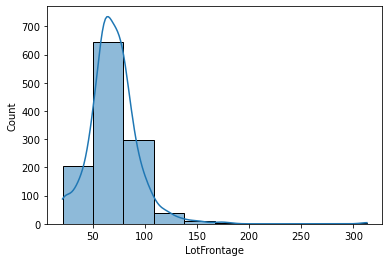

In [8]:
#checking LotFrontage

sns.histplot(housing['LotFrontage'], bins=10, kde=True)
plt.show()

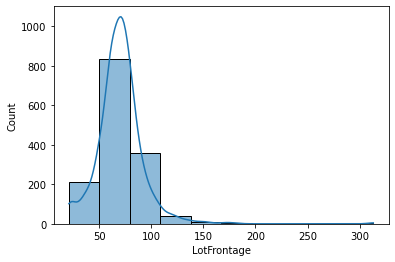

In [9]:
#data is skewed to the left so will fill NaN with median value by neighbourhood

housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].apply(lambda x : x.fillna(x.median()))
sns.histplot(housing['LotFrontage'], bins=10, kde=True)
plt.show()

In [10]:
#filling NaN in electrical
housing['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [11]:
housing['Electrical'].fillna('SBrkr', inplace=True)

In [12]:
#recheck nulls
null_dataframe(housing)

,null_perc
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
GarageFinish,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageQual,5.547945
GarageCond,5.547945


In [13]:
"""'MasVnrArea', 'GarageYrBuilt' should be 0 since NaN means area=0
for garageyrblt, we do not know the year and is NaN when no garage so a value of 0 will cancel term in regression 
when year not present"""
zero_nans = ['MasVnrArea', 'GarageYrBlt']

for i in zero_nans:
    housing[i].fillna(0, inplace=True)

In [14]:
#imputing for NA

na_nans = ['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageCond','BsmtQual',
           'BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1']

for i in na_nans:
    housing[i].fillna('NA', inplace=True)

    
housing['PoolQC'].value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [15]:
#recheck nulls
null_dataframe(housing)

,null_perc
GarageQual,5.547945
MasVnrType,0.547945


In [16]:
#forgot some, filling now

housing['GarageQual'].fillna('None - Garage', inplace=True)
housing['MasVnrType'].fillna('None', inplace=True)

#### Data Type Checks and Fixes

In [17]:
#some features are type int but really should be objects - using data dictionary for selection

int_to_obj = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath']

housing[int_to_obj] = housing[int_to_obj].astype('object')

#dropping Id
housing.drop(['Id'], axis=1, inplace=True)


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [19]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


In [20]:
#lists of num and cat variables

num_vars = list(housing.describe().T.index)

#list of categorical variables
cat_vars = [i for i in housing.columns if i not in num_vars]


print('number of numeric variables ', len(num_vars))
print('number of categorical variables ', len(cat_vars))

number of numeric variables  30
number of categorical variables  50


### Conducting more exploration of data

In [21]:
#functions for plotting numeric and categorical variables

#plotting numeric variables

def numeric_graphs(df, num_vars, y_value):
    for col in num_vars:
        plt.figure()
        plt.tight_layout()
        plt.figure(figsize=(20,5))

        plt.subplot(1,2,1)
        plt.gca().set(xlabel=col, ylabel='frequency')
        sns.regplot(x = df[col], y=df[y_value])
        stp = stats.pearsonr(df[col], df[y_value])
        str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
        plt.gca().set_title(str_title, fontsize=11)
        plt.subplot(1,2,2)
        sns.histplot(df[col], bins=10, kde=True)
        plt.show()

        
#boxplots for categorical vs response
def cat_plots(df, cat_vars, y_value):
    for col in cat_vars:
        plt.figure()
        plt.tight_layout()
        plt.figure(figsize=(20,5))
        
        plt.gca().set(xlabel=col, ylabel=y_value)
        plt.subplot(1,2,1)
        sns.countplot(df[col], linewidth=1.0)
        plt.xticks(rotation=30)
        
        plt.subplot(1,2,2)
        sns.barplot(x = df[col], y=df[y_value], linewidth=1.0,orient='v')
        plt.xticks(rotation=30)
        plt.show()


#### visualising numeric variables

<Figure size 432x288 with 0 Axes>

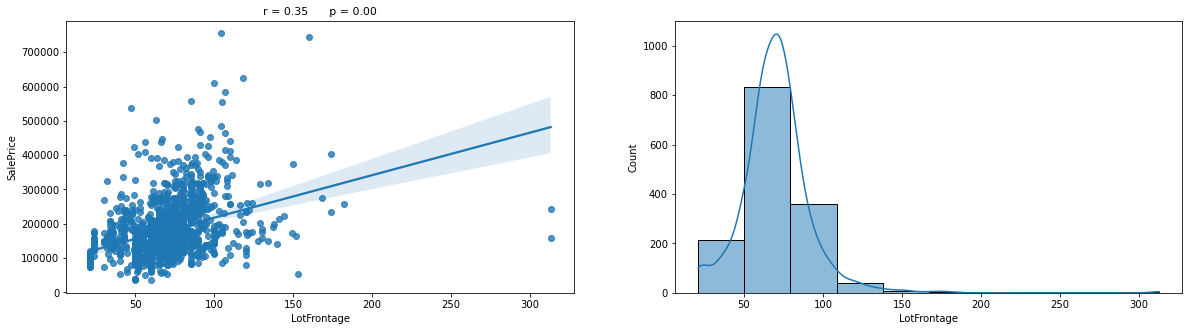

<Figure size 432x288 with 0 Axes>

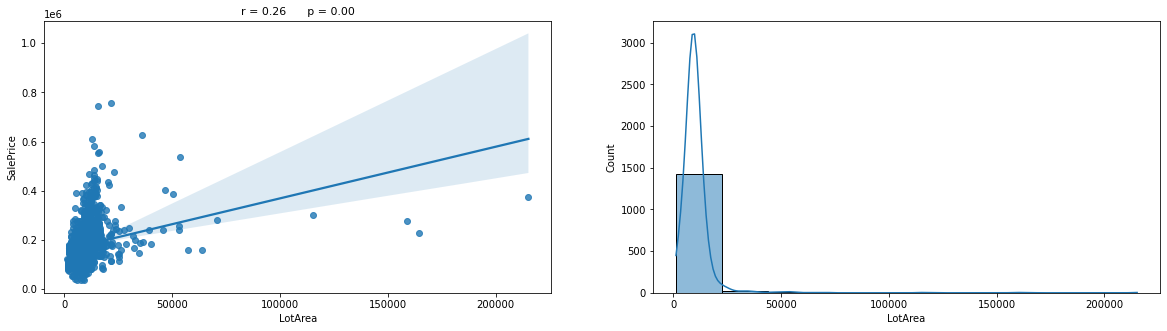

<Figure size 432x288 with 0 Axes>

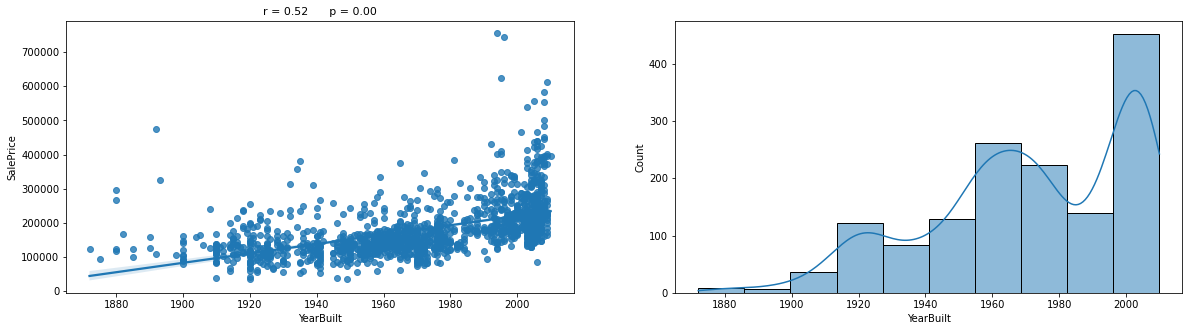

<Figure size 432x288 with 0 Axes>

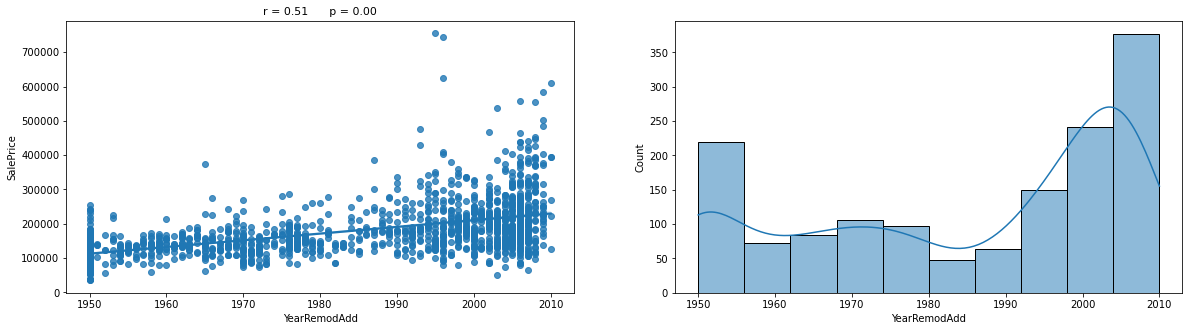

<Figure size 432x288 with 0 Axes>

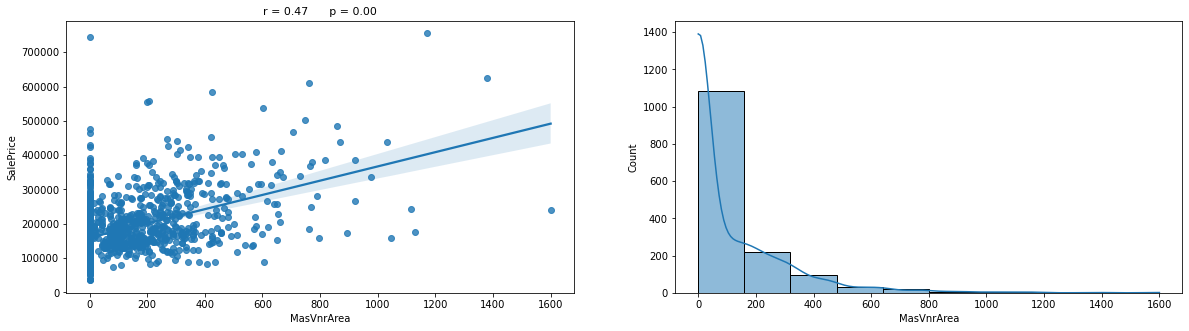

<Figure size 432x288 with 0 Axes>

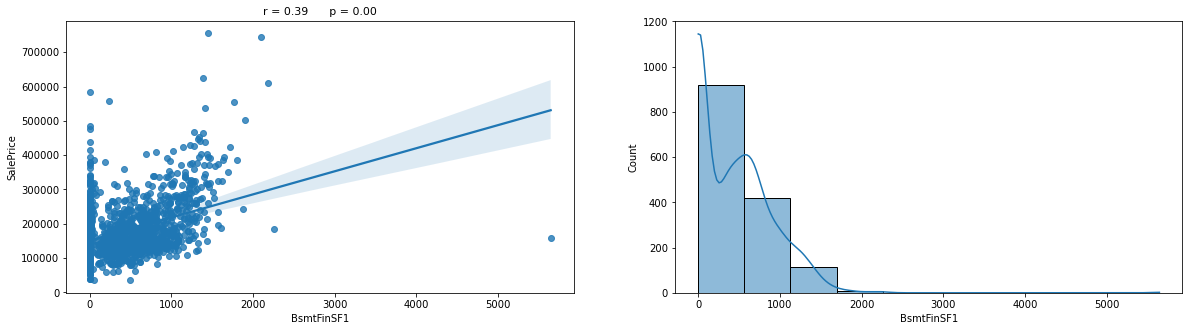

<Figure size 432x288 with 0 Axes>

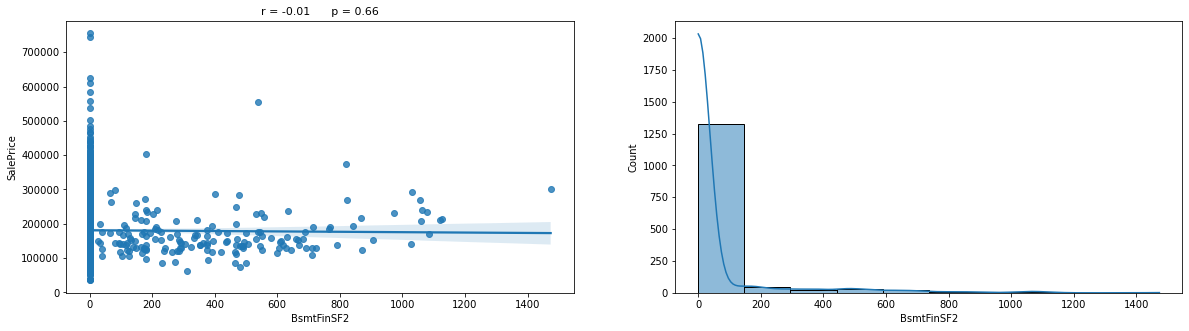

<Figure size 432x288 with 0 Axes>

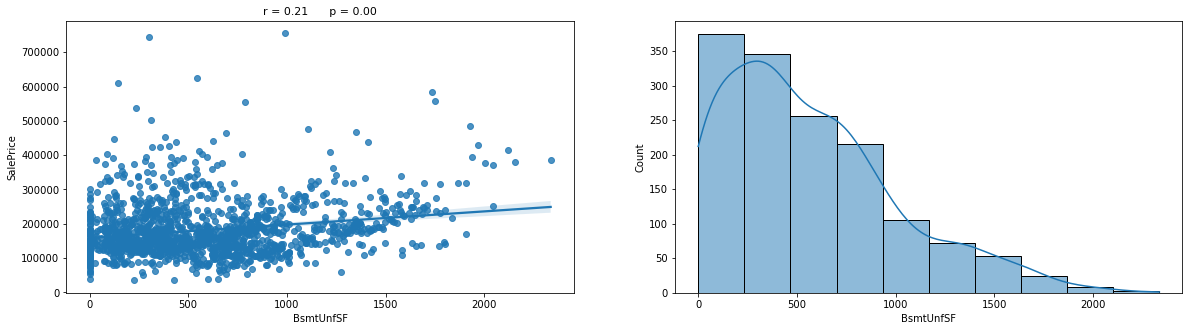

<Figure size 432x288 with 0 Axes>

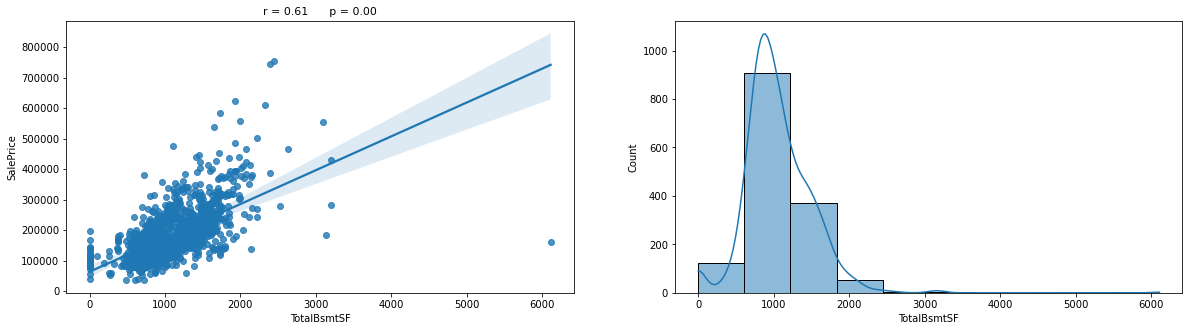

<Figure size 432x288 with 0 Axes>

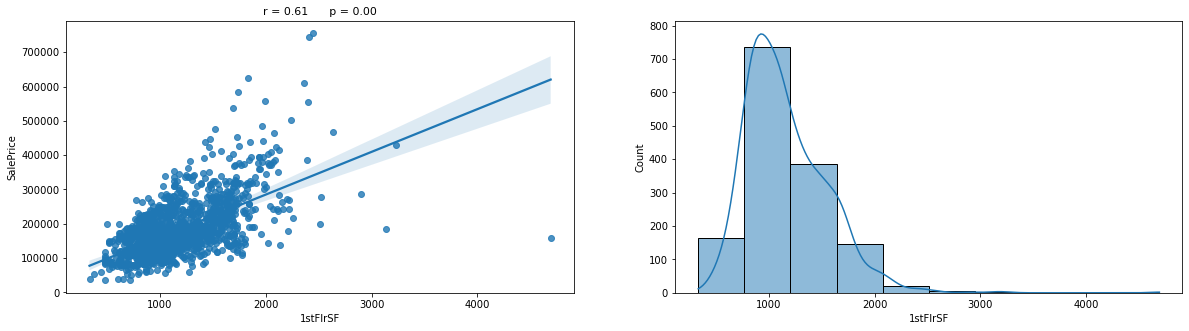

<Figure size 432x288 with 0 Axes>

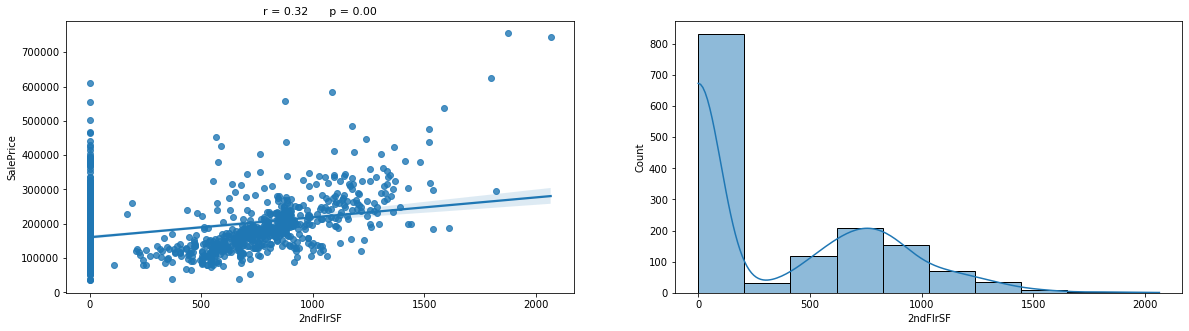

<Figure size 432x288 with 0 Axes>

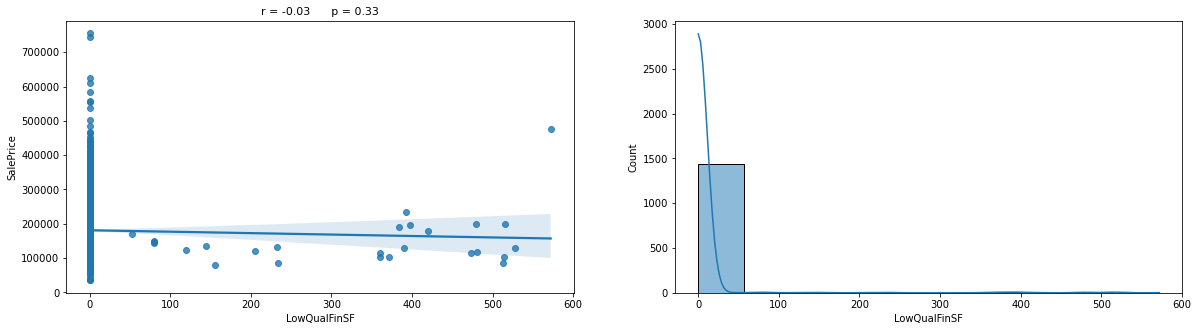

<Figure size 432x288 with 0 Axes>

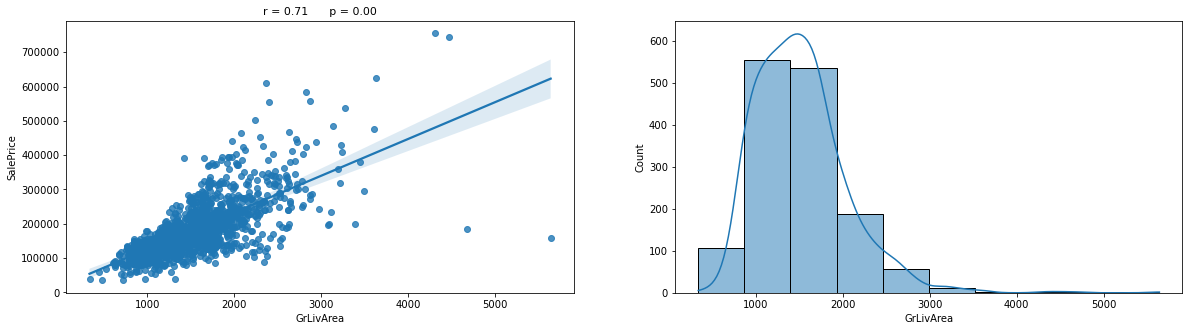

<Figure size 432x288 with 0 Axes>

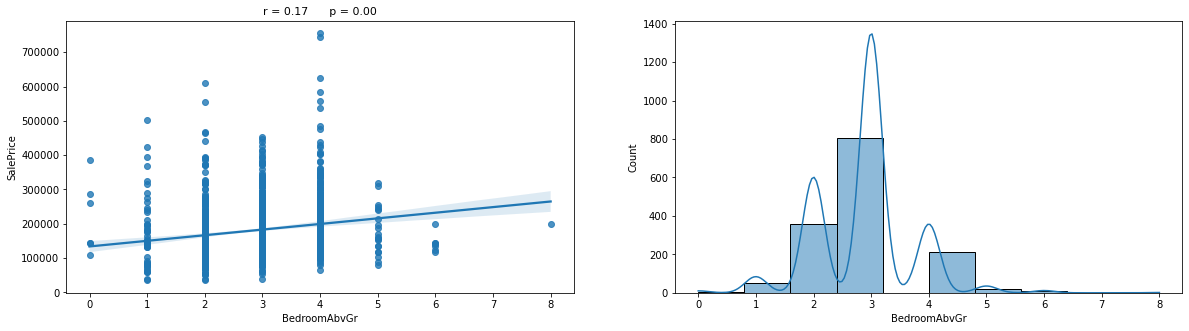

<Figure size 432x288 with 0 Axes>

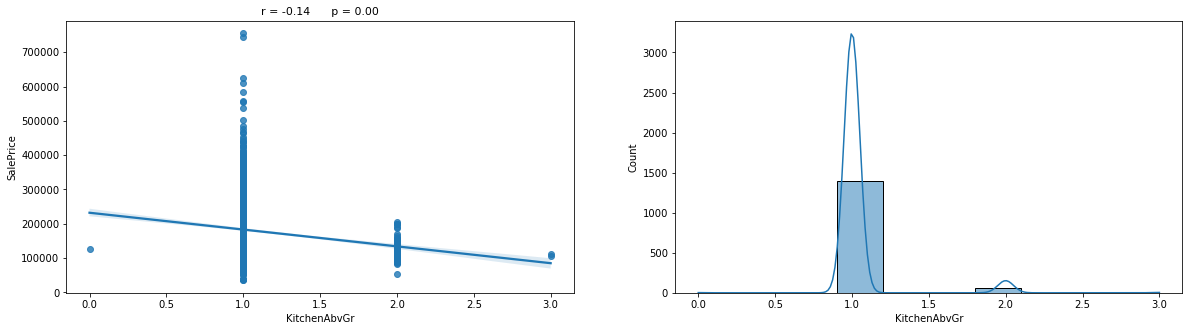

<Figure size 432x288 with 0 Axes>

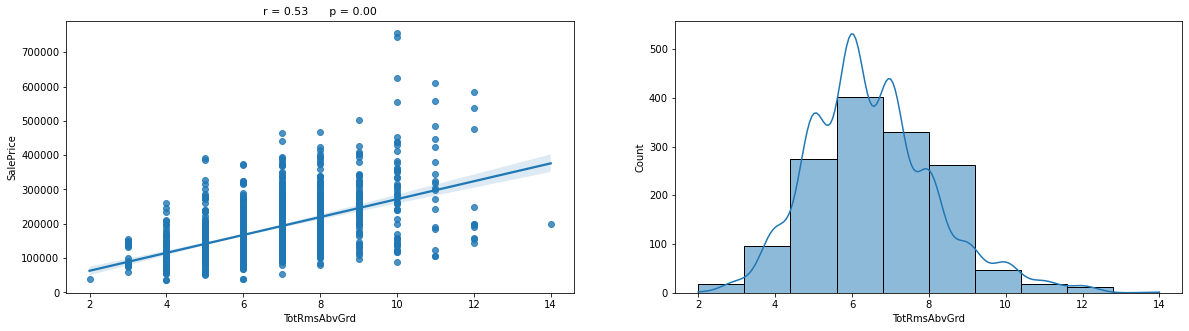

<Figure size 432x288 with 0 Axes>

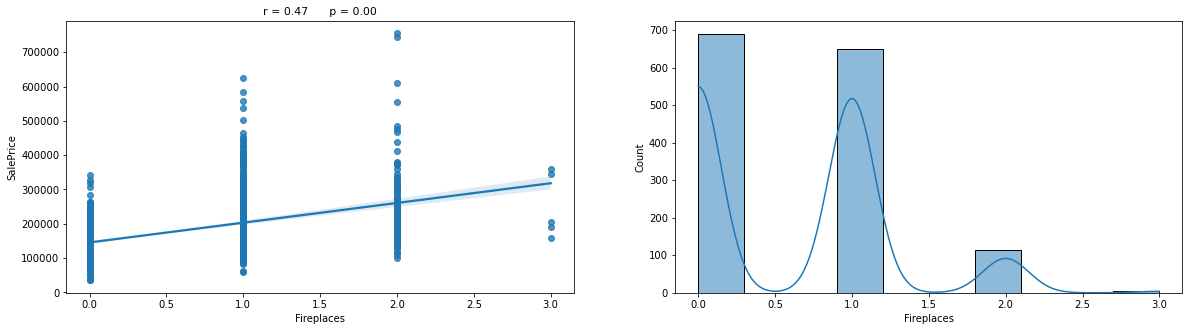

<Figure size 432x288 with 0 Axes>

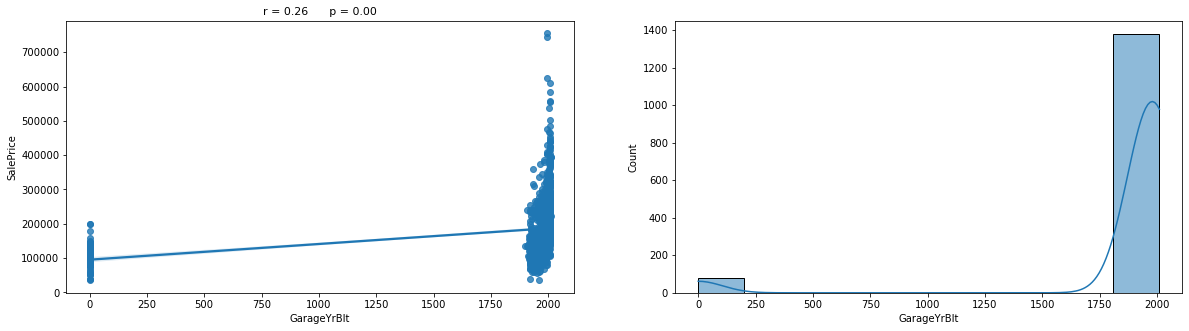

<Figure size 432x288 with 0 Axes>

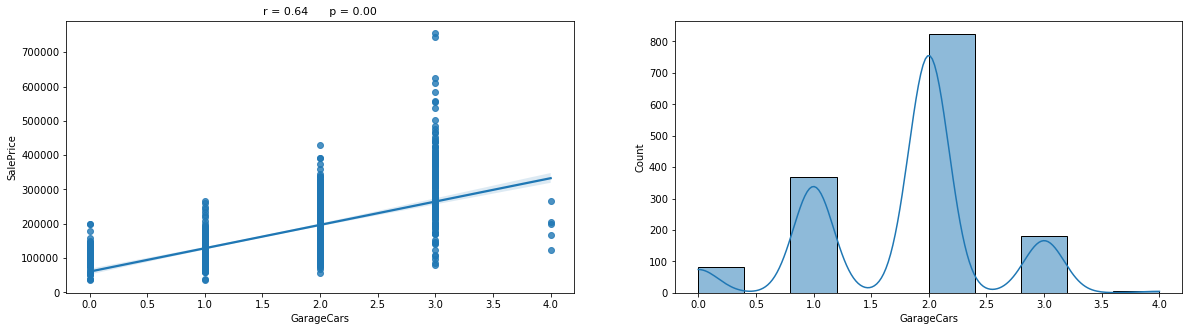

<Figure size 432x288 with 0 Axes>

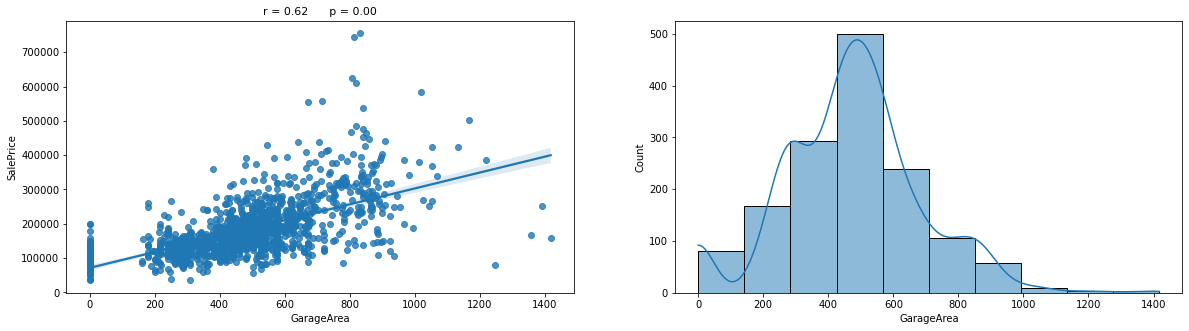

<Figure size 432x288 with 0 Axes>

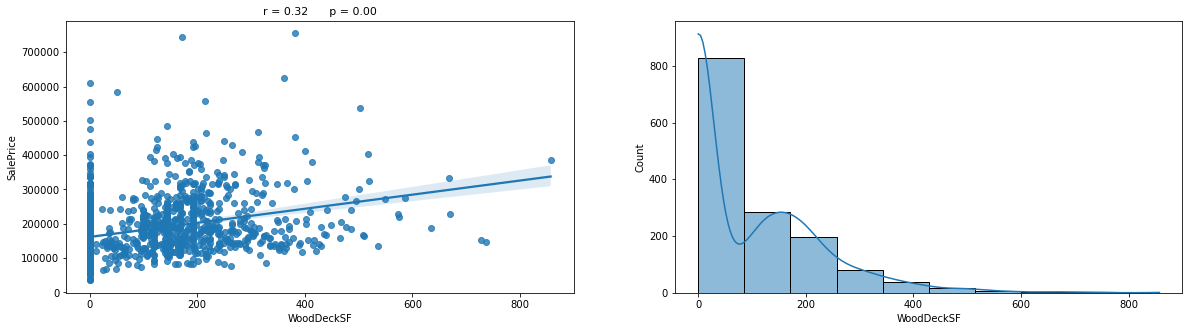

<Figure size 432x288 with 0 Axes>

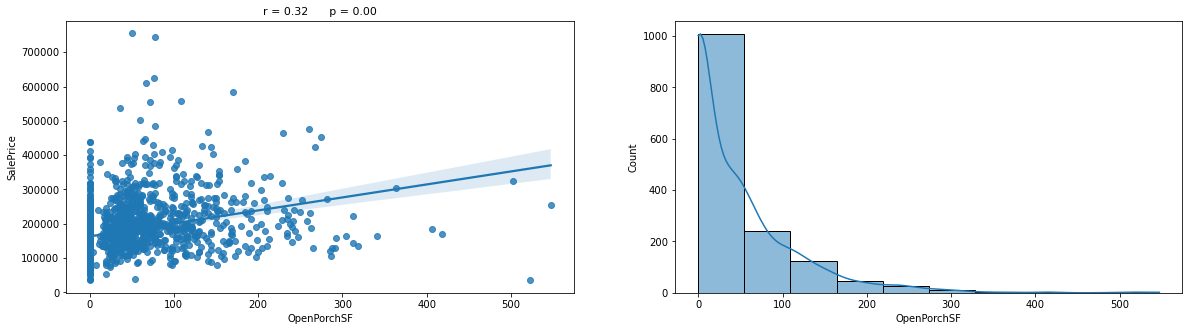

<Figure size 432x288 with 0 Axes>

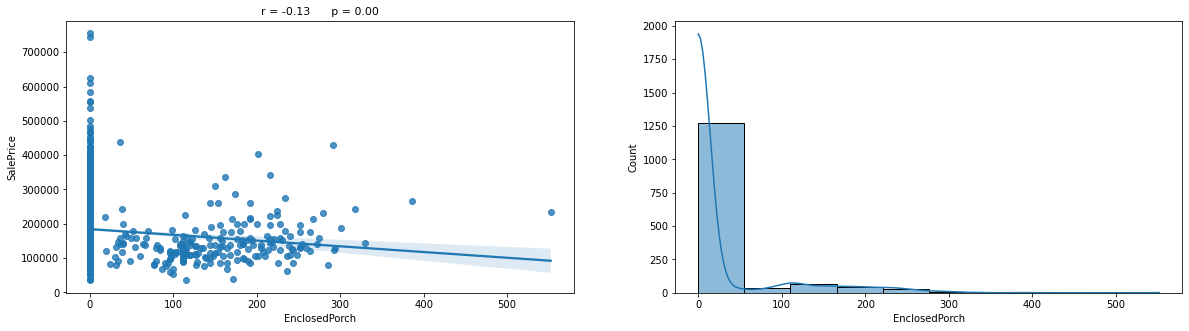

<Figure size 432x288 with 0 Axes>

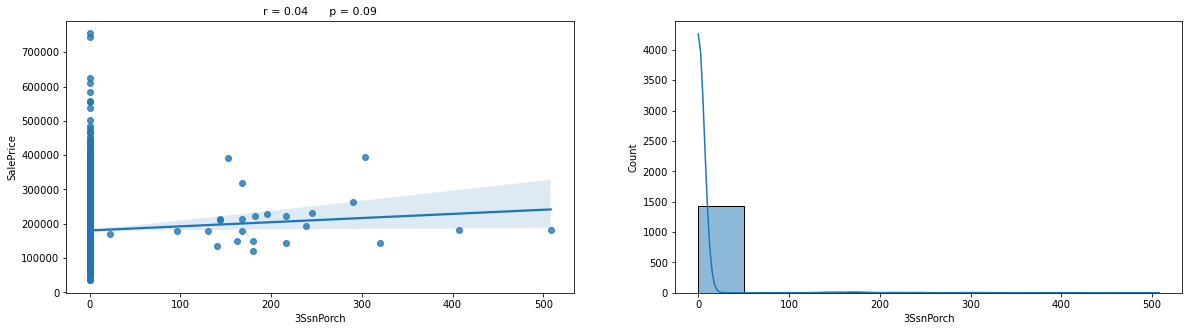

<Figure size 432x288 with 0 Axes>

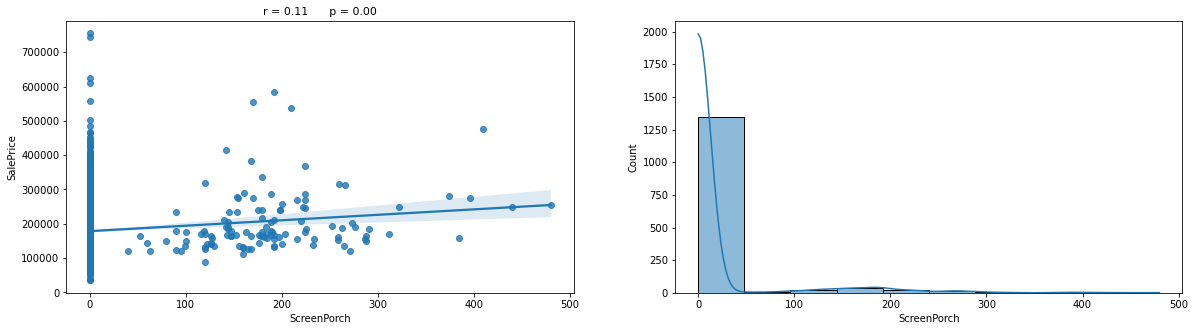

<Figure size 432x288 with 0 Axes>

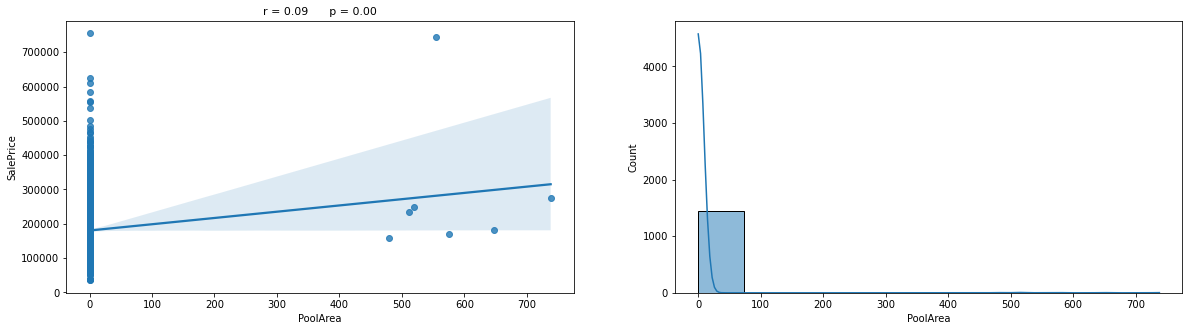

<Figure size 432x288 with 0 Axes>

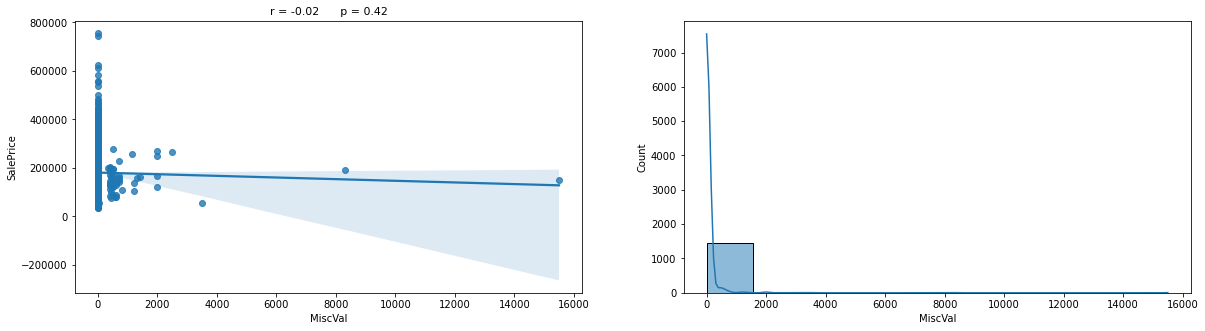

<Figure size 432x288 with 0 Axes>

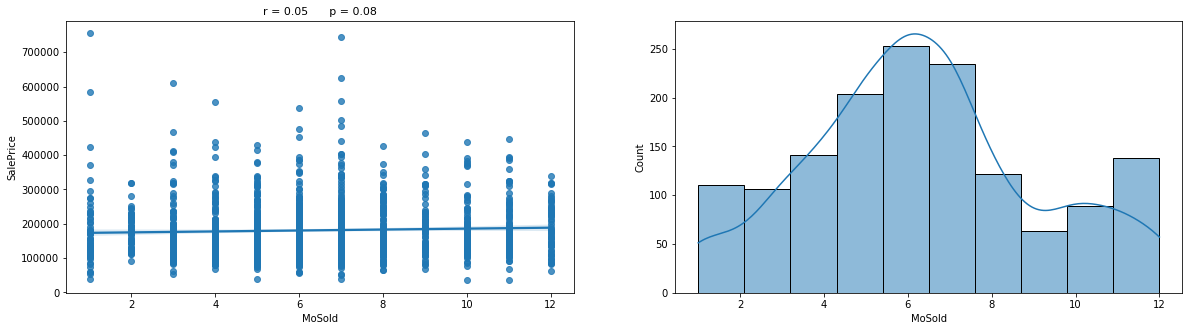

<Figure size 432x288 with 0 Axes>

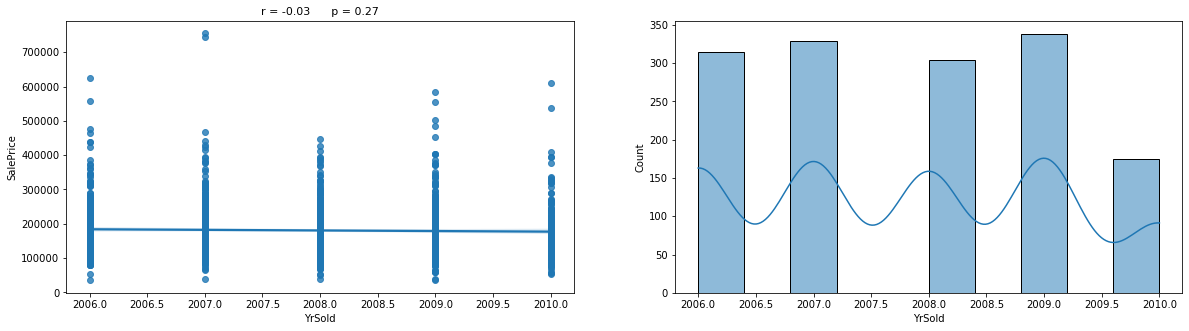

<Figure size 432x288 with 0 Axes>

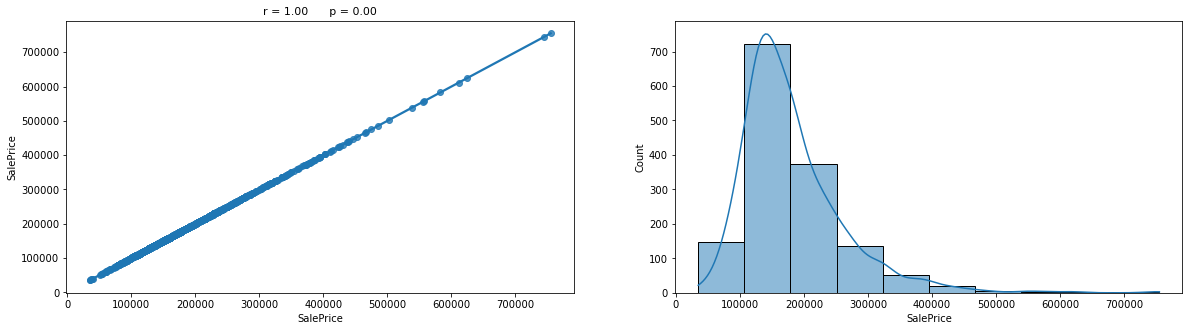

In [22]:
numeric_graphs(housing, num_vars, 'SalePrice')

Some features have a high p value (>0.05) with the response SalePrice. Will drop these features
['BsmtFinSF2','LowQualFinSF','3SsnPorch','MiscVal']

GrLivArea appears to be the total squarefootage. Will drop ['1stFlrSF','2ndFlrSF'] however, it would be a good thing to note whether a home has one or two floors so a new feature will be derived.

TotalBsmtSF is the combination of all other basement squarefootage features. Will drop ['BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']

some features have more than 90% values as 0, they are unbalanced and will not contribute significantly so I will drop these as well ['EnclosedPorch', 'ScreenPorch','PoolArea']


outside of those, quite a few features are linearly related with the response so this is a good sign for our models

In [23]:
#dropping high pvalue features
housing.drop( ['BsmtFinSF2','LowQualFinSF','3SsnPorch','MiscVal'], axis=1, inplace=True)

#dropping more than 90% zero numeric fields
housing.drop(['EnclosedPorch', 'ScreenPorch','PoolArea'], axis=1, inplace=True)

#creating Has2ndFlr feature
housing['Has2ndFlr'] = housing['2ndFlrSF'].map(lambda x : 1 if x > 0 else 0)

housing[['Has2ndFlr','2ndFlrSF']].head()

,Has2ndFlr,2ndFlrSF
0,1,854
1,0,0
2,1,866
3,1,756
4,1,1053


In [24]:
#dropping basement and 1st anf 2nd floor features

housing.drop( ['1stFlrSF','2ndFlrSF','BsmtUnfSF','BsmtFinSF1'], axis=1, inplace=True)

In [25]:
#count numeric features again
num_vars = list(housing.describe().T.index)

print('number of numeric variables ', len(num_vars))

number of numeric variables  20


#### visualising categorical variables

<Figure size 432x288 with 0 Axes>

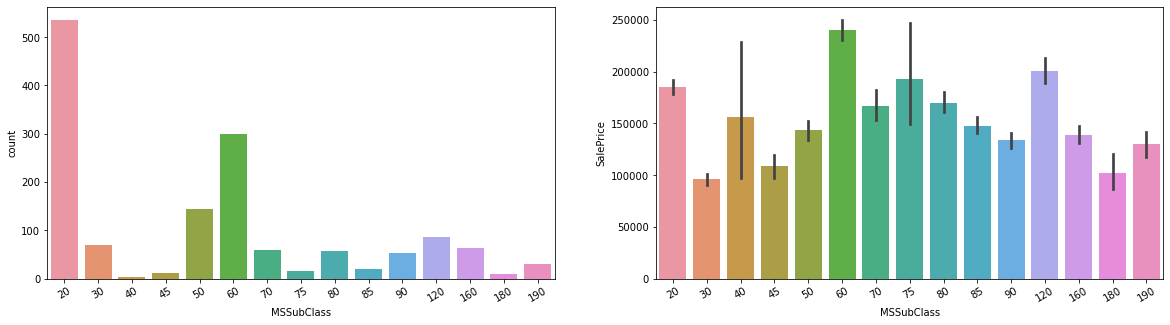

<Figure size 432x288 with 0 Axes>

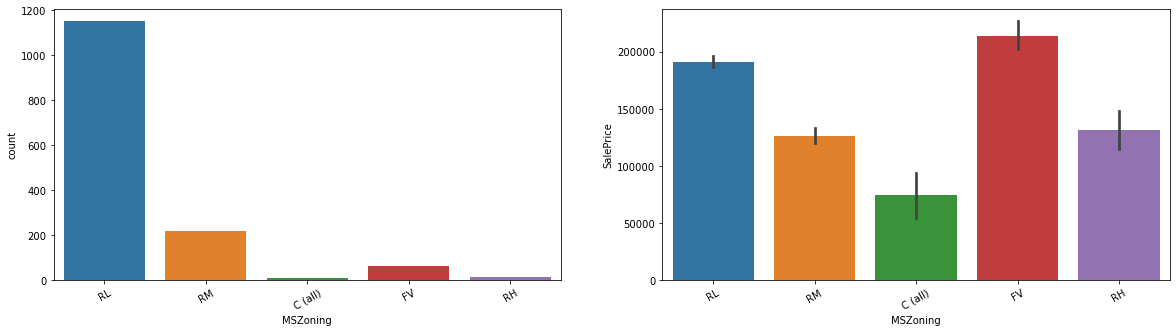

<Figure size 432x288 with 0 Axes>

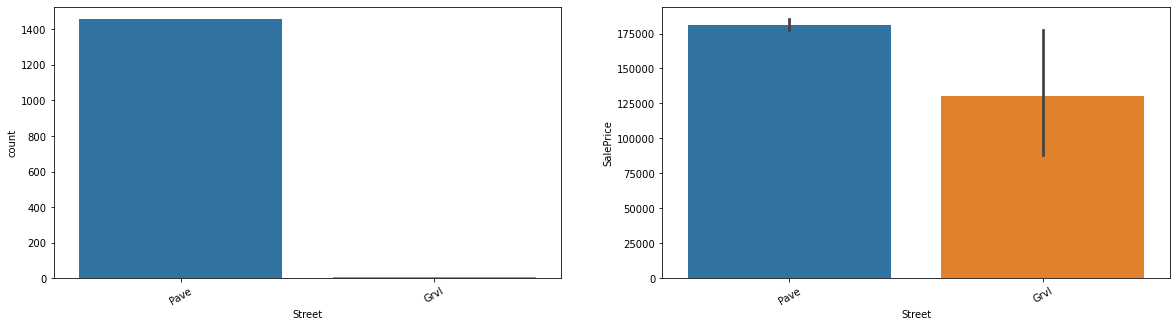

<Figure size 432x288 with 0 Axes>

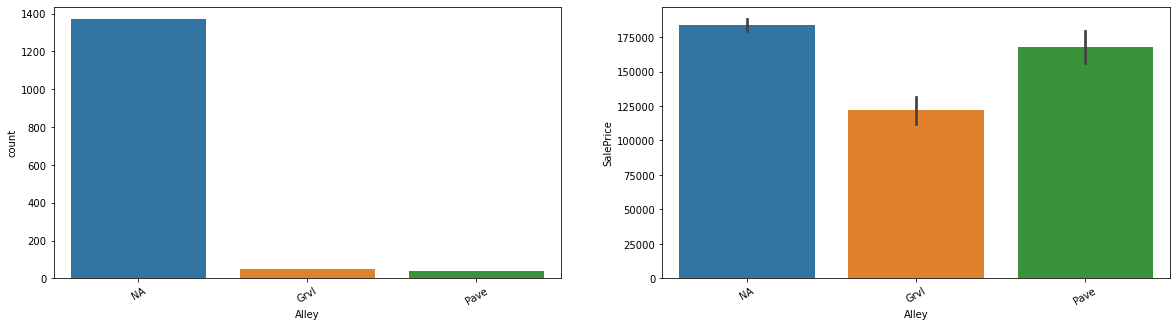

<Figure size 432x288 with 0 Axes>

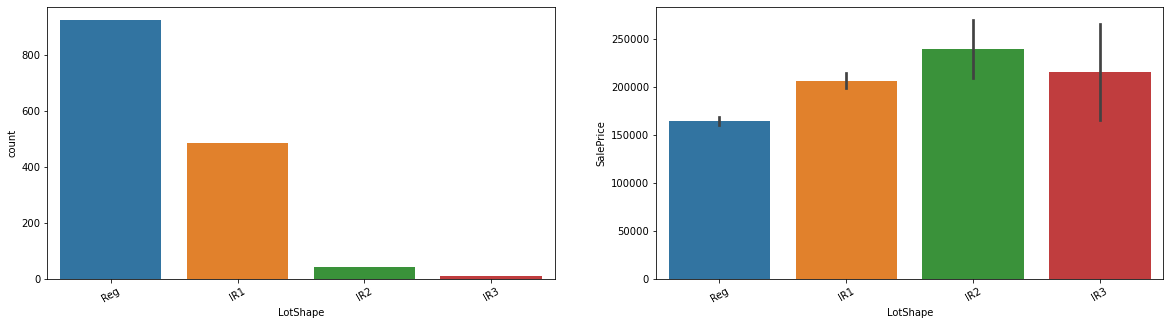

<Figure size 432x288 with 0 Axes>

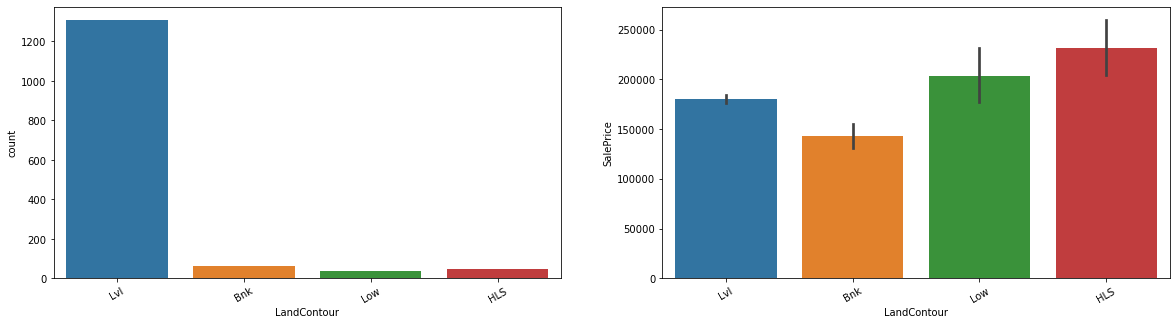

<Figure size 432x288 with 0 Axes>

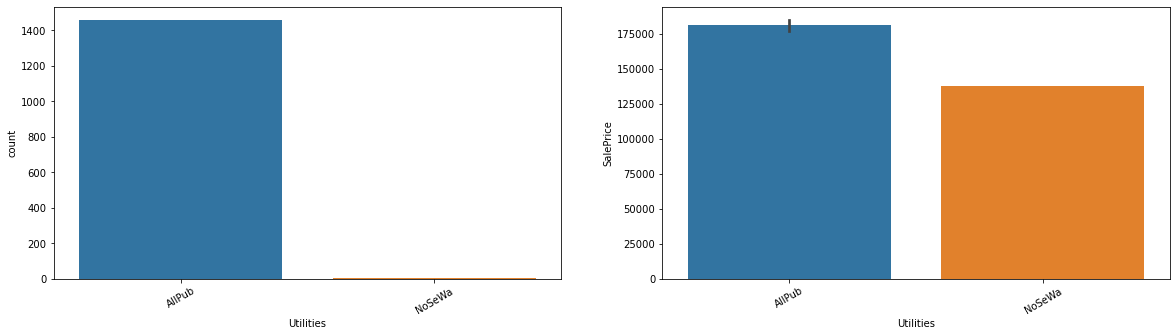

<Figure size 432x288 with 0 Axes>

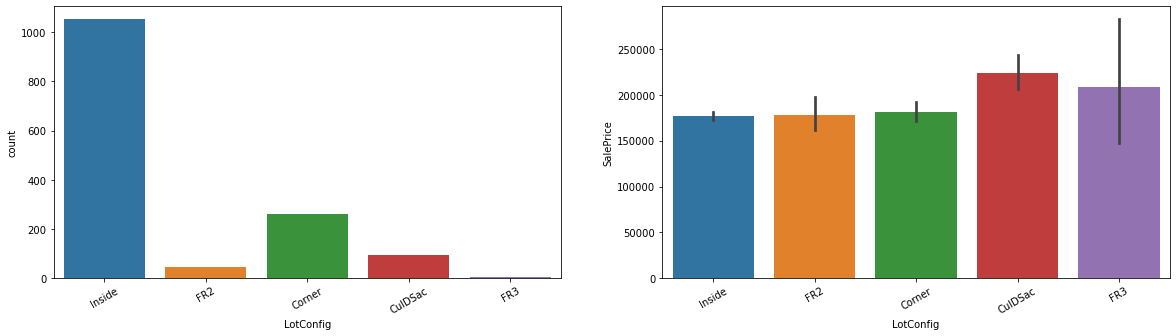

<Figure size 432x288 with 0 Axes>

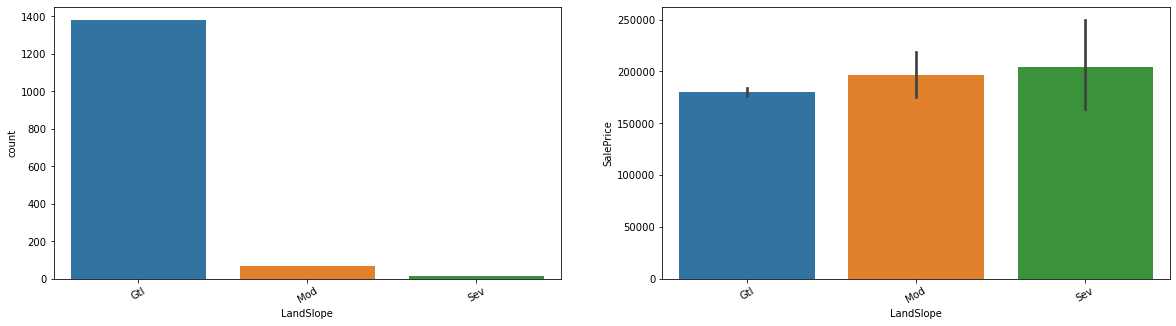

<Figure size 432x288 with 0 Axes>

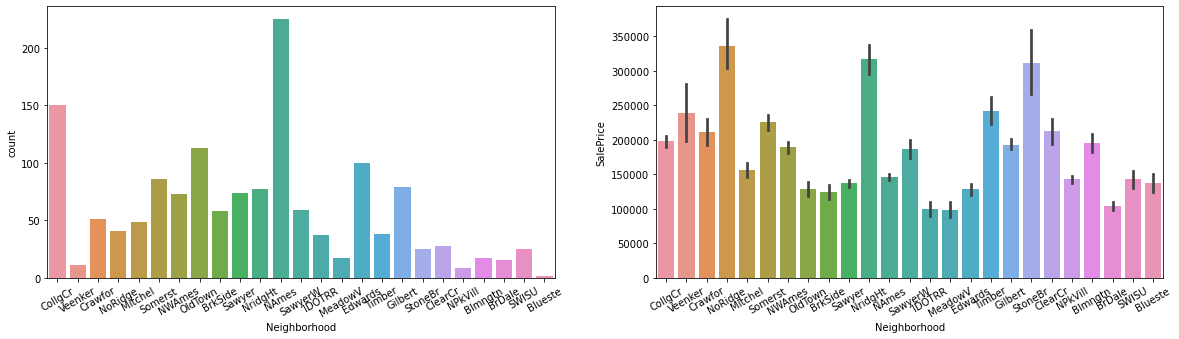

<Figure size 432x288 with 0 Axes>

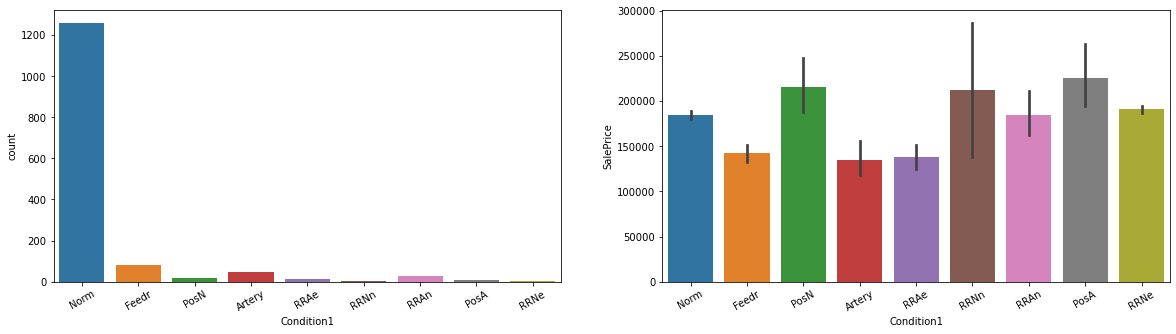

<Figure size 432x288 with 0 Axes>

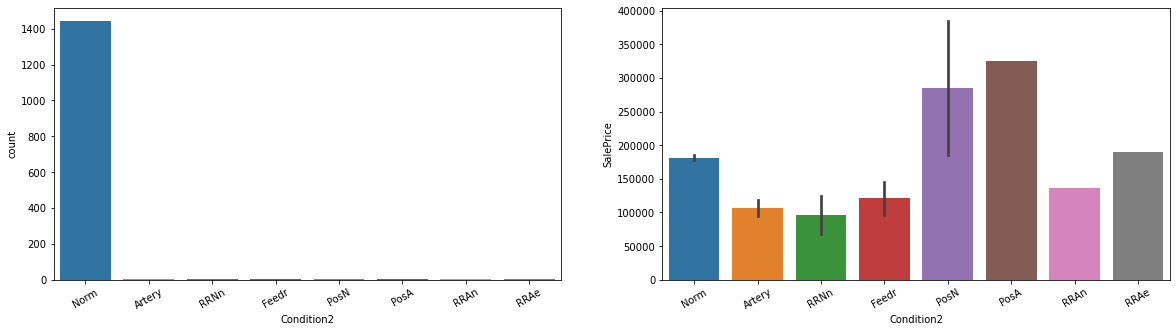

<Figure size 432x288 with 0 Axes>

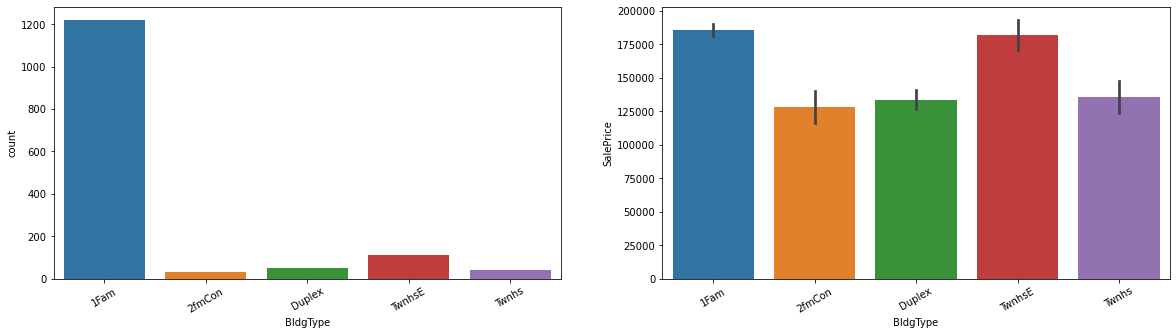

<Figure size 432x288 with 0 Axes>

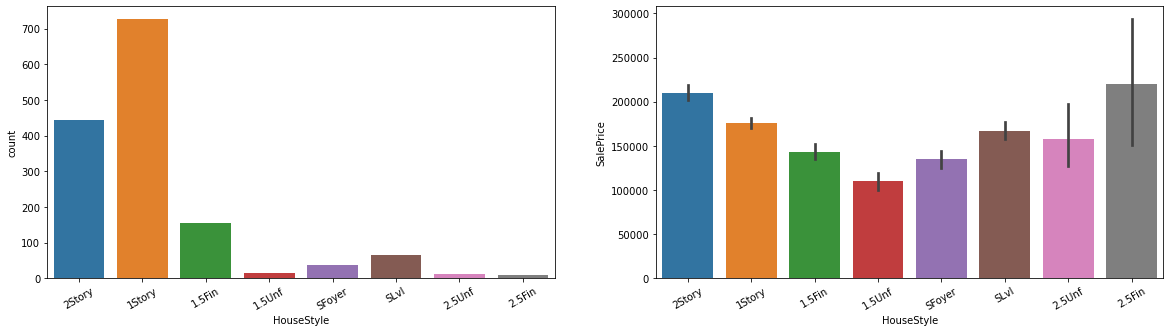

<Figure size 432x288 with 0 Axes>

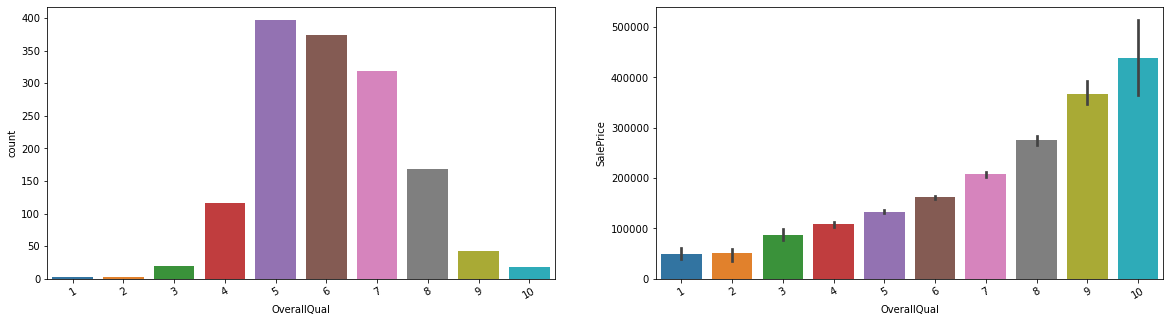

<Figure size 432x288 with 0 Axes>

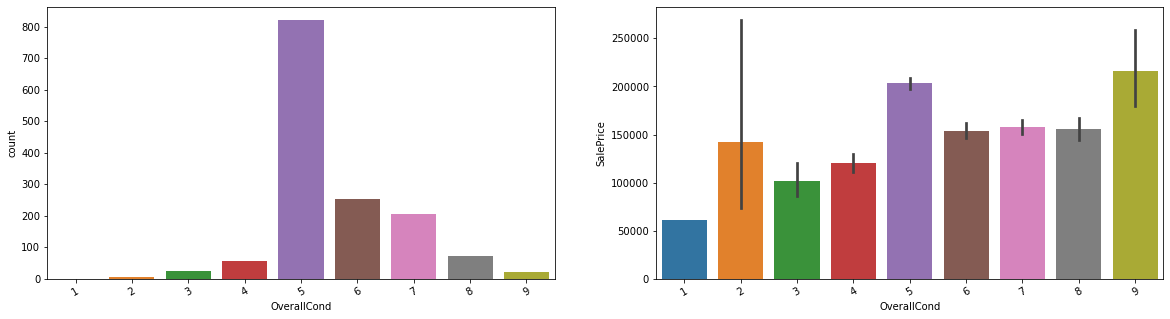

<Figure size 432x288 with 0 Axes>

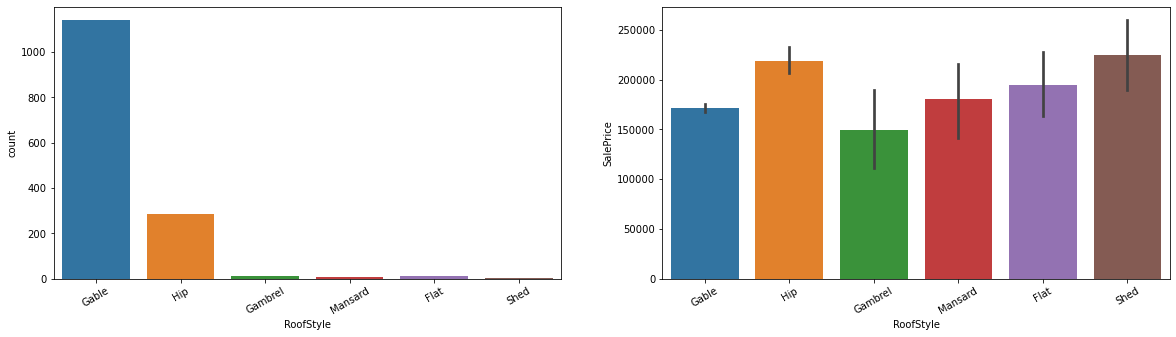

<Figure size 432x288 with 0 Axes>

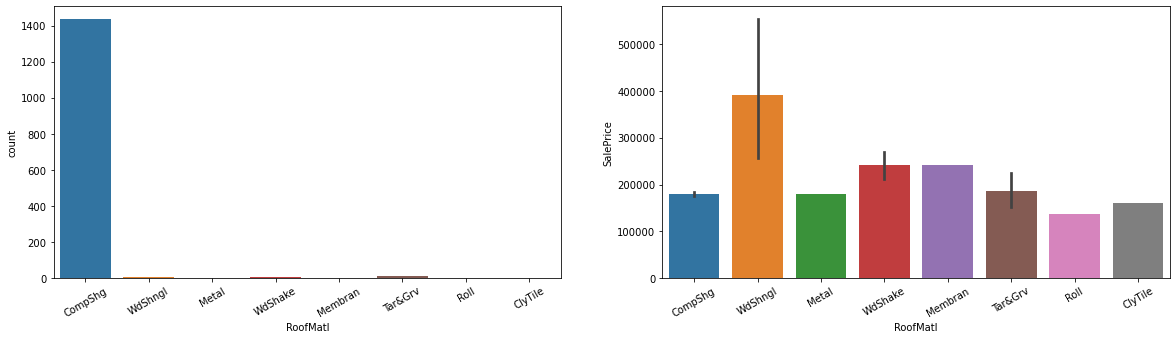

<Figure size 432x288 with 0 Axes>

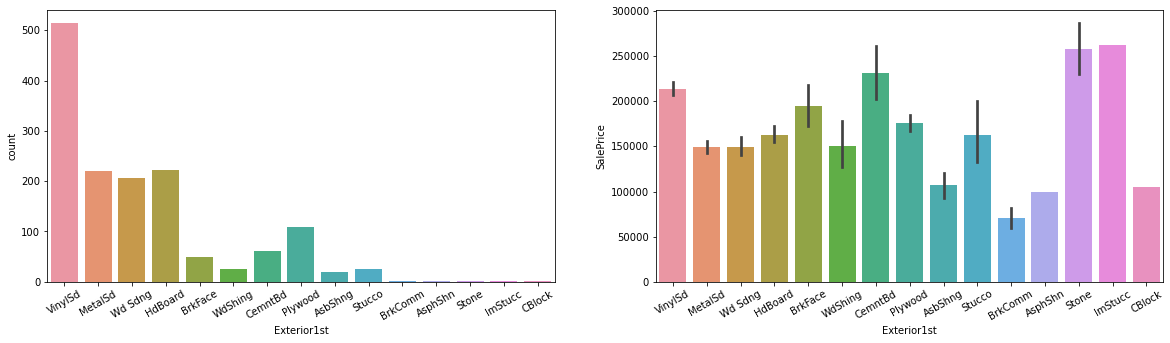

<Figure size 432x288 with 0 Axes>

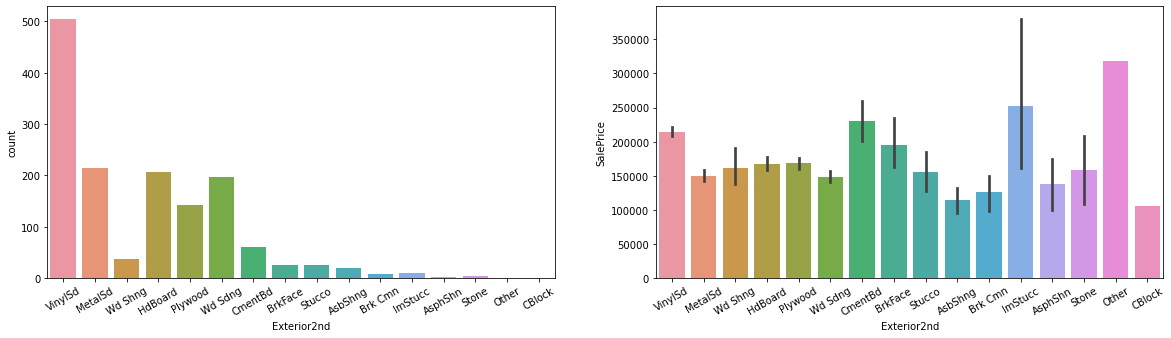

<Figure size 432x288 with 0 Axes>

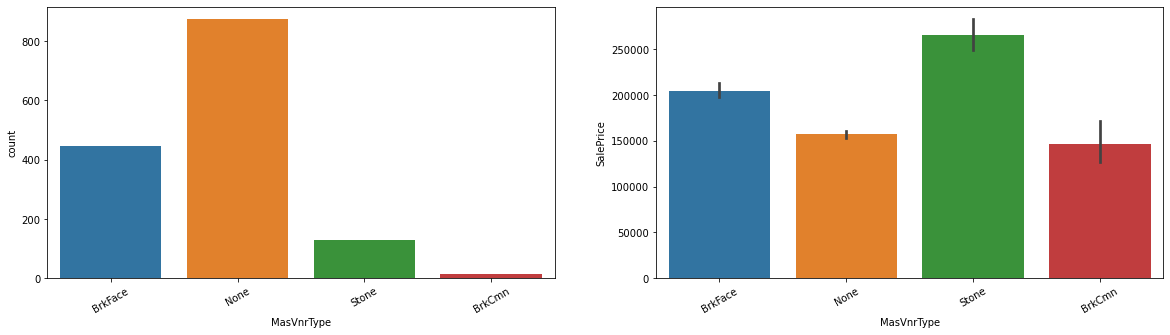

<Figure size 432x288 with 0 Axes>

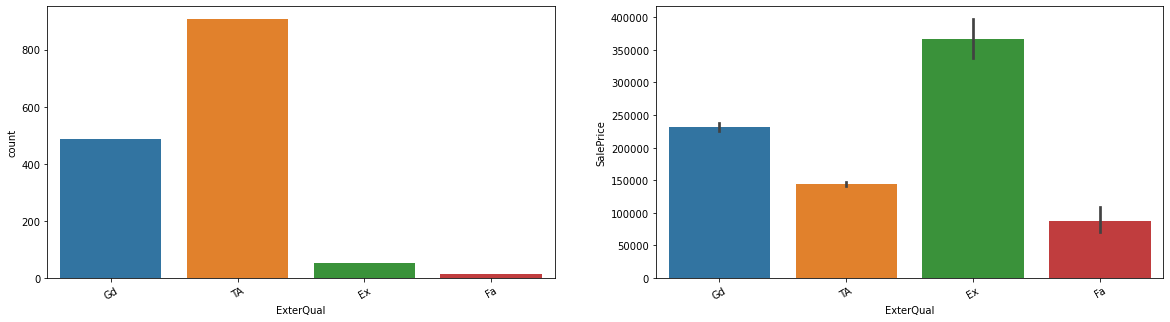

<Figure size 432x288 with 0 Axes>

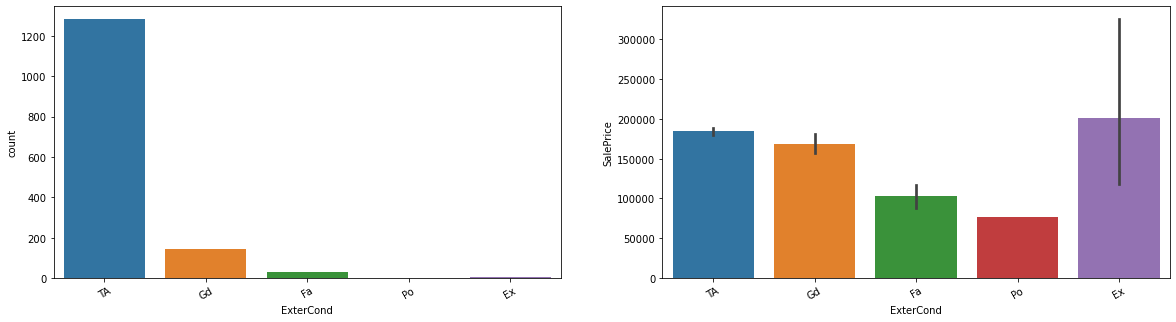

<Figure size 432x288 with 0 Axes>

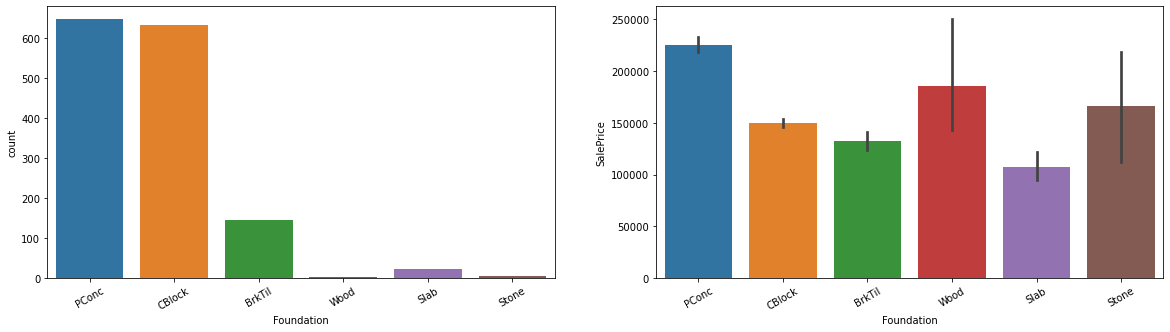

<Figure size 432x288 with 0 Axes>

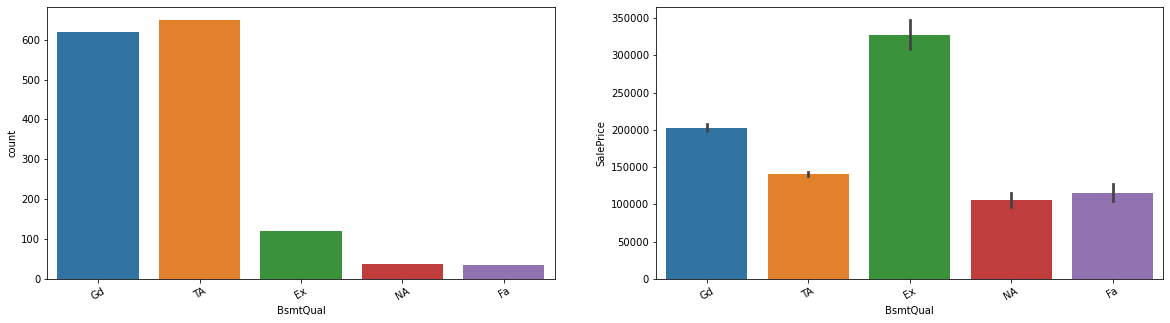

<Figure size 432x288 with 0 Axes>

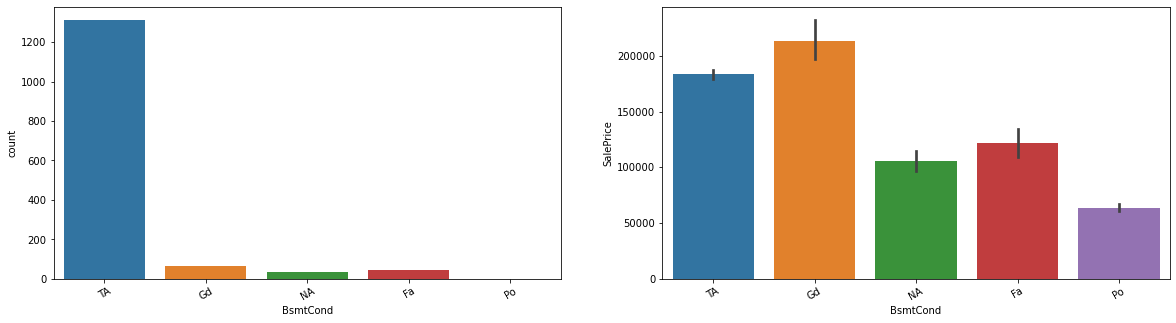

<Figure size 432x288 with 0 Axes>

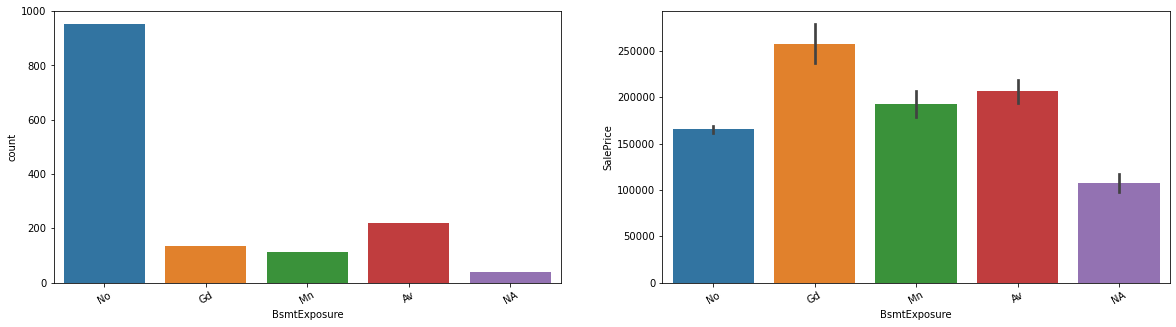

<Figure size 432x288 with 0 Axes>

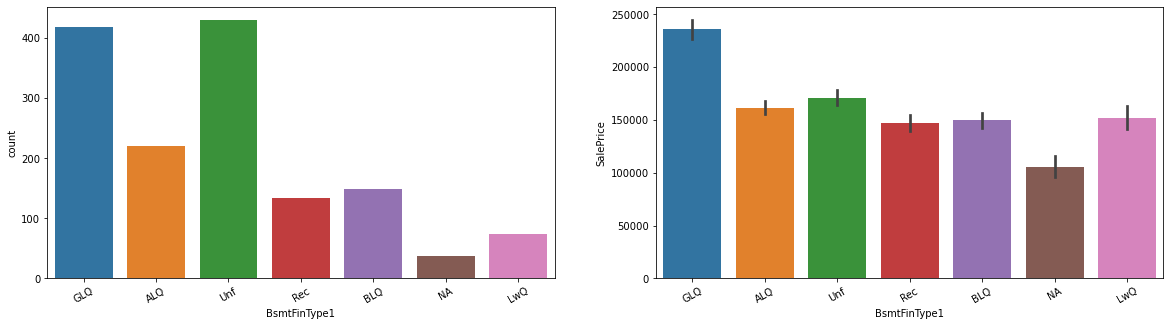

<Figure size 432x288 with 0 Axes>

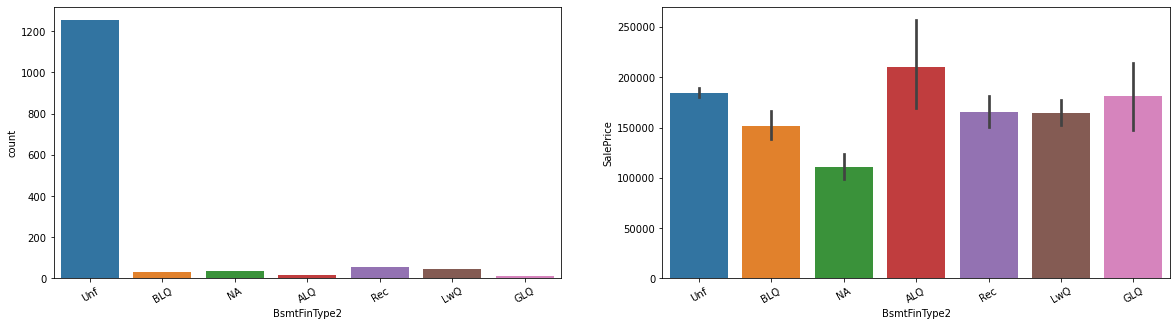

<Figure size 432x288 with 0 Axes>

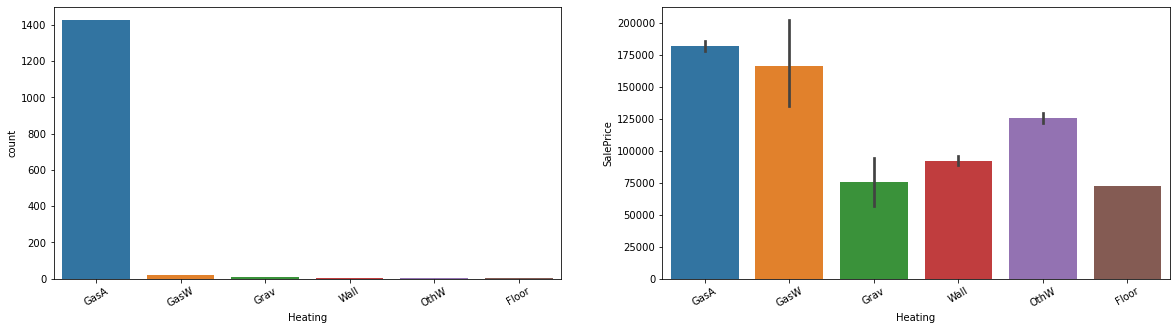

<Figure size 432x288 with 0 Axes>

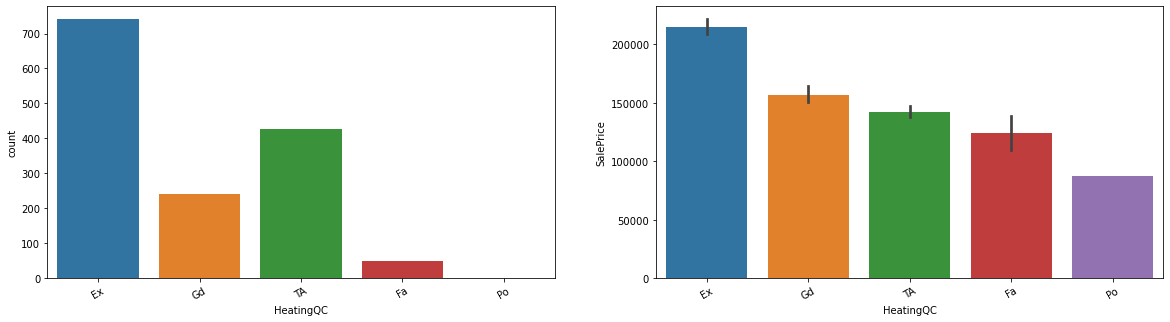

<Figure size 432x288 with 0 Axes>

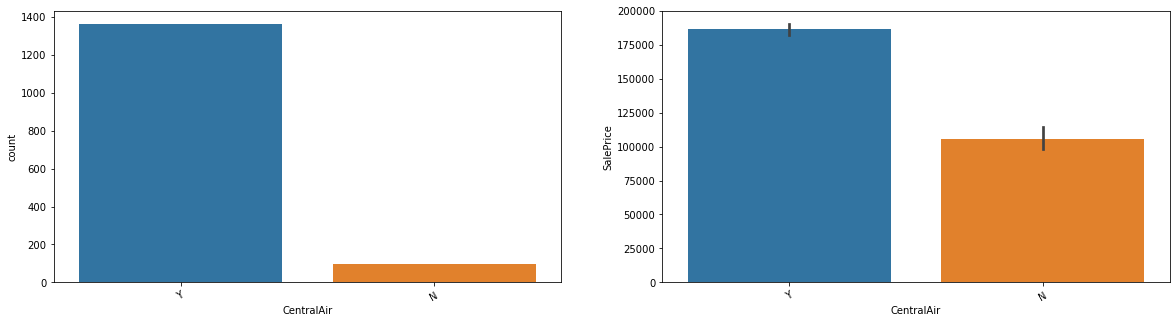

<Figure size 432x288 with 0 Axes>

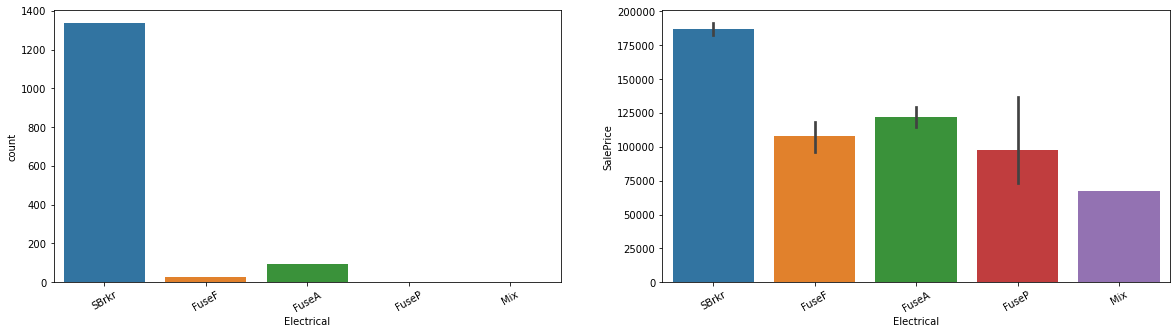

<Figure size 432x288 with 0 Axes>

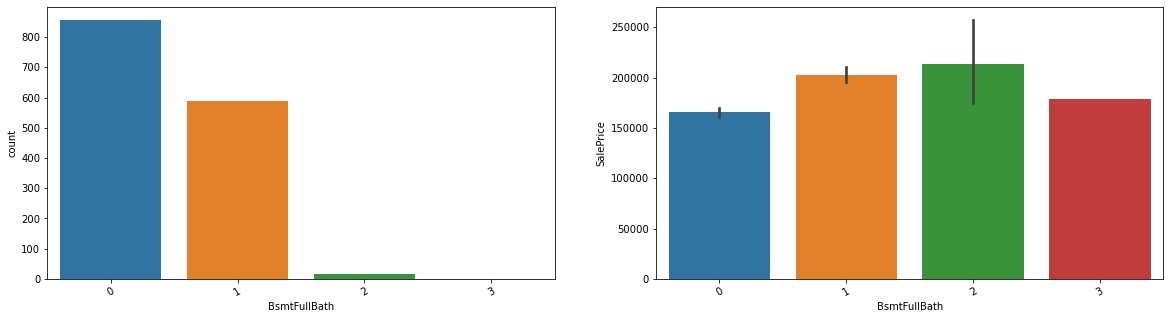

<Figure size 432x288 with 0 Axes>

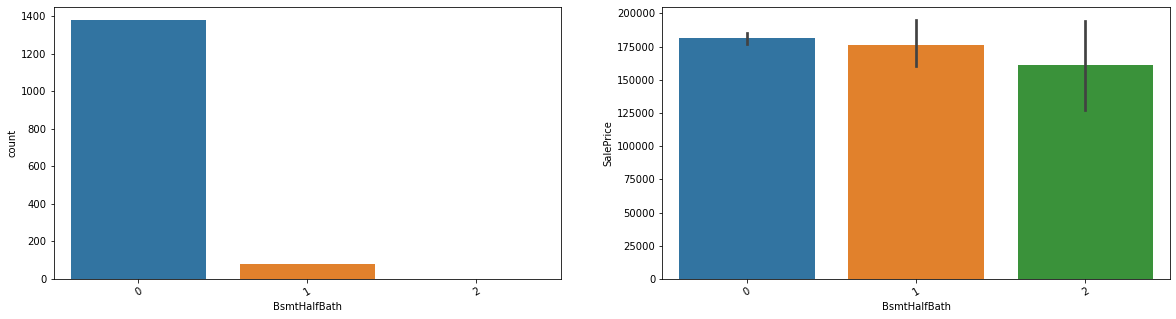

<Figure size 432x288 with 0 Axes>

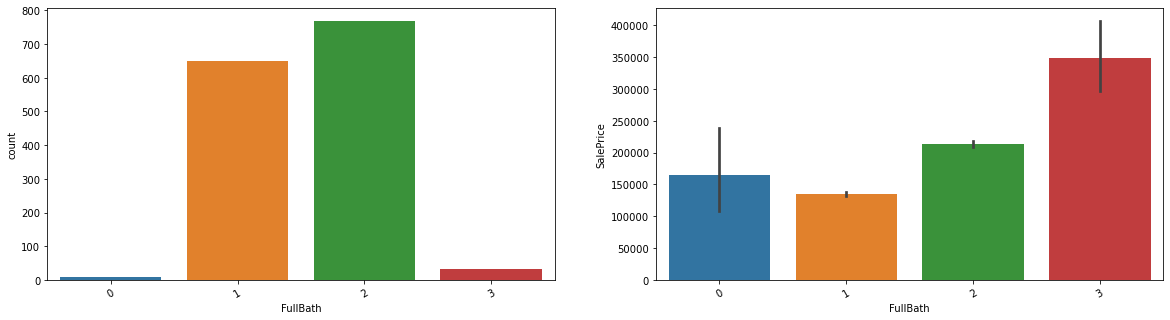

<Figure size 432x288 with 0 Axes>

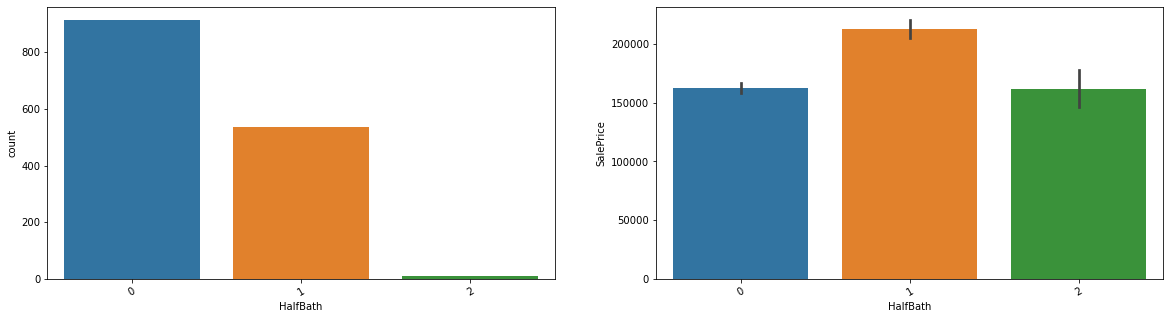

<Figure size 432x288 with 0 Axes>

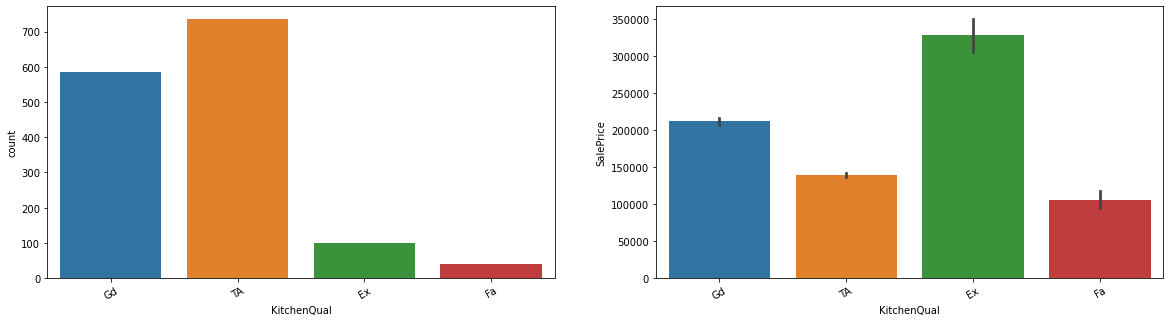

<Figure size 432x288 with 0 Axes>

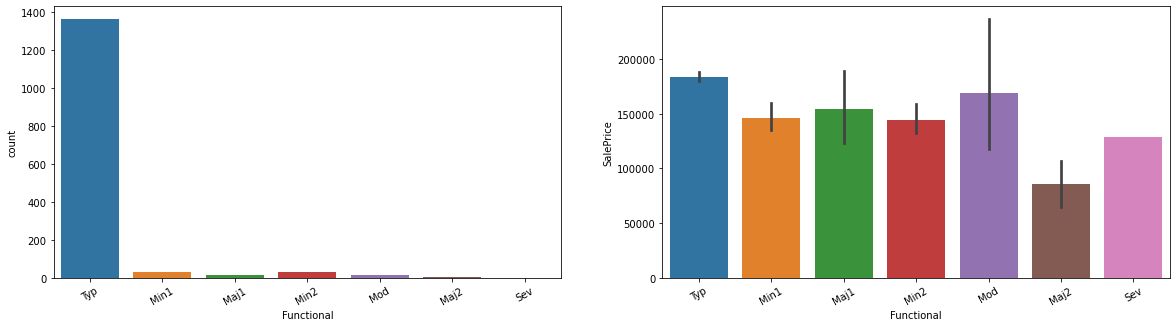

<Figure size 432x288 with 0 Axes>

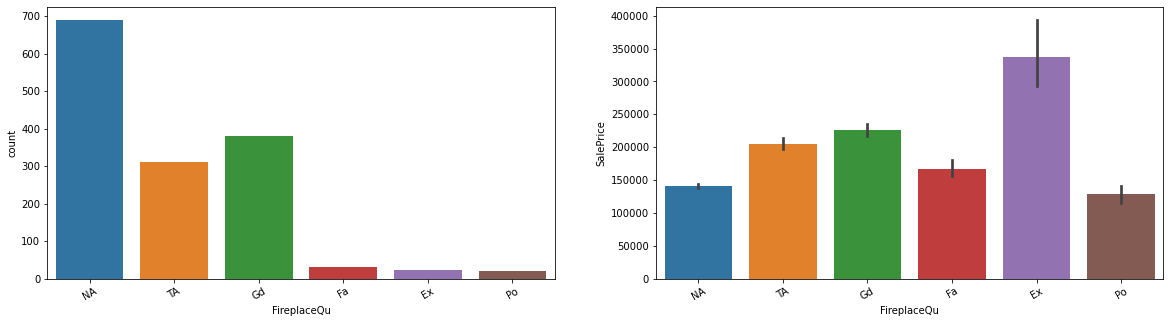

<Figure size 432x288 with 0 Axes>

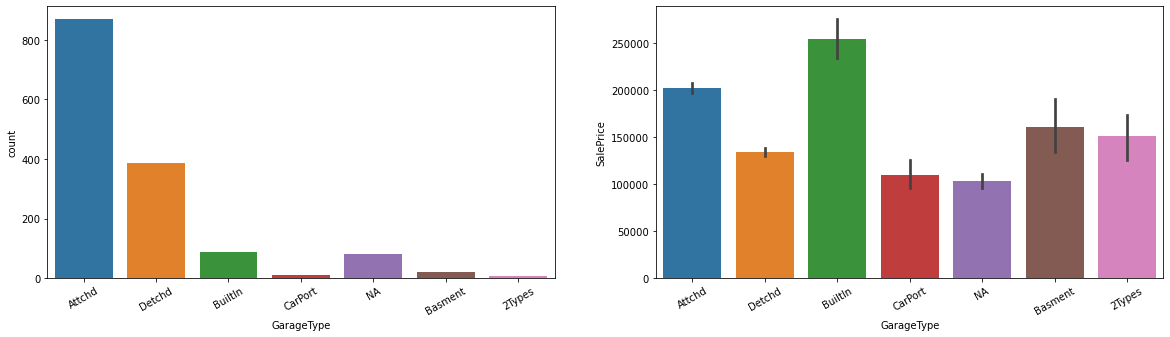

<Figure size 432x288 with 0 Axes>

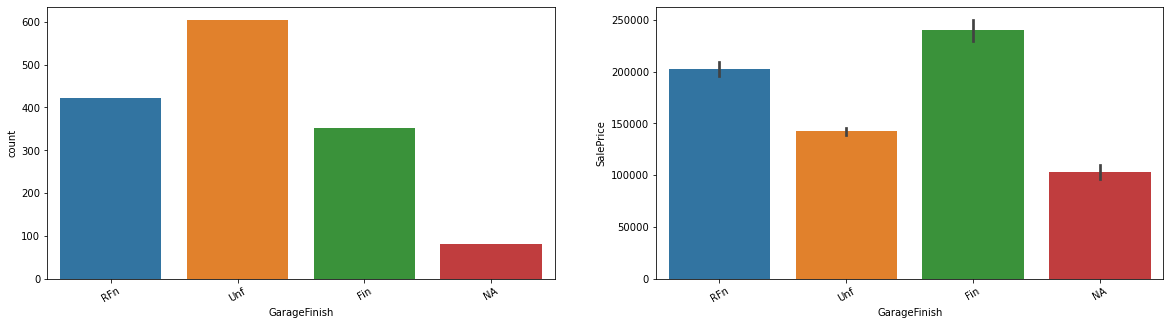

<Figure size 432x288 with 0 Axes>

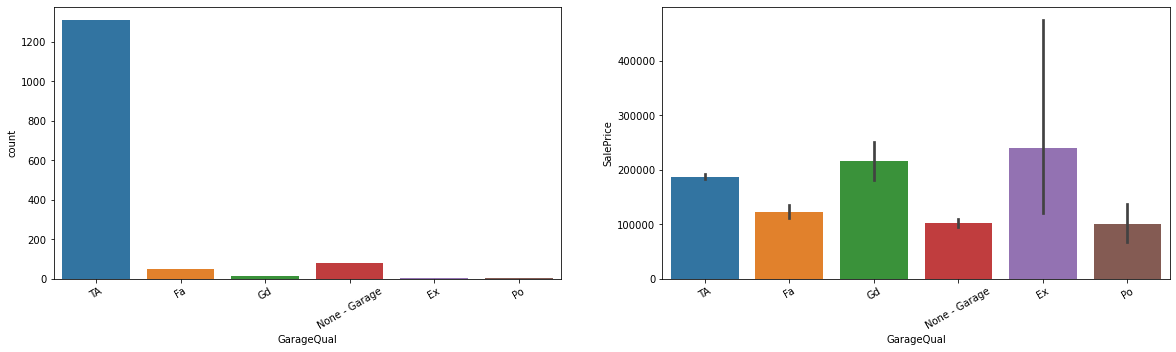

<Figure size 432x288 with 0 Axes>

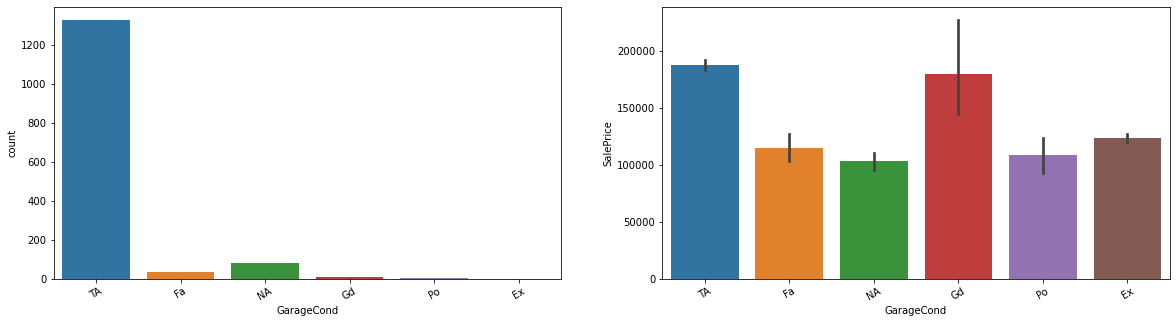

<Figure size 432x288 with 0 Axes>

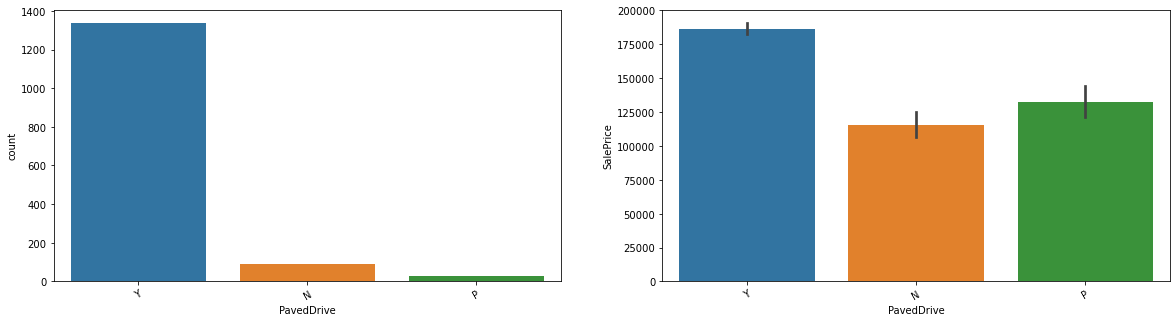

<Figure size 432x288 with 0 Axes>

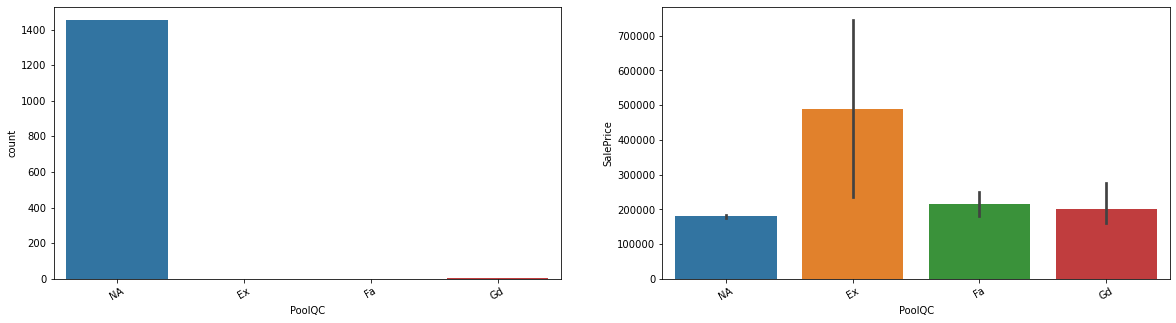

<Figure size 432x288 with 0 Axes>

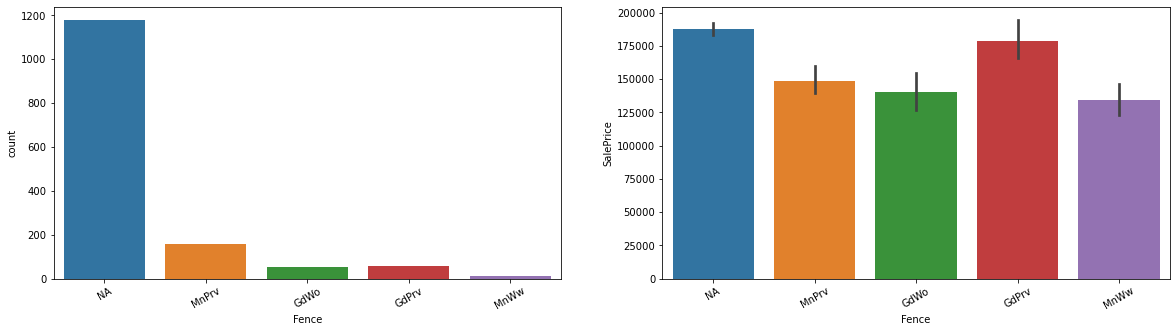

<Figure size 432x288 with 0 Axes>

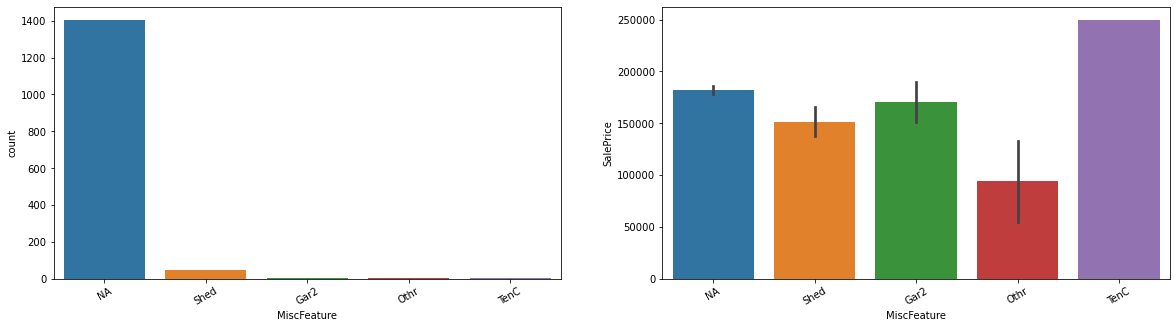

<Figure size 432x288 with 0 Axes>

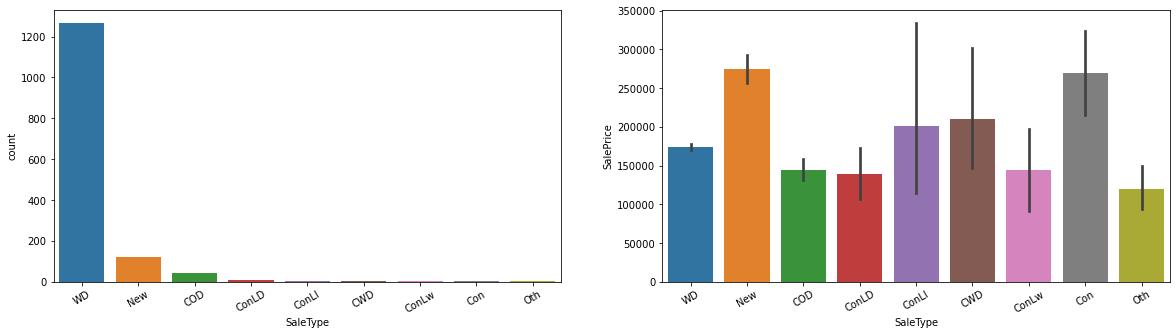

<Figure size 432x288 with 0 Axes>

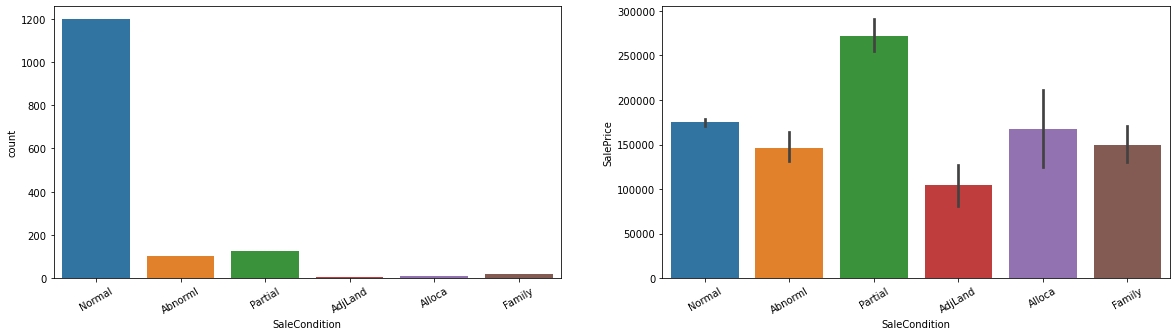

In [26]:
cat_plots(housing, cat_vars, 'SalePrice')

Some very unbalnced categorical features to be dropped
 ['Street','Alley','Utilities','LandSlope','Condition2','RoofMatl','Heating','PoolQC','MiscFeature']
 
 'OverallQual' is ordinal and clearly increases price.
 'Functional' is somewhat unbalnaced but i can see this feature desribing the functionality of a home to be important to buyers. Additionally, this copuld be an ordinal feature since the descriptions become progressively less functional
 
 

In [27]:
housing.drop(['Street','Alley','Utilities','LandSlope',
              'Condition2','RoofMatl','Heating','PoolQC','MiscFeature'], axis=1, inplace=True)

cat_vars = [i for i in housing.columns if i not in num_vars]
print('number of categorical variables ', len(cat_vars))

number of categorical variables  41


In [28]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0


fields with huge differenced between min and 25% quantil;e and 75% quantile and max may be considered fields with outliers that can be removed.
those fields are ['LotArea','MasVnrArea','SalePrice']

In [29]:
#outlier treatment  ['LotArea','MasVnrArea','SalePrice']
#LotArea
def outlier_remover(df, fields):
    for col in fields:
        Q1 = housing[col].quantile(0.25)
        Q3 = housing[col].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = Q1 - 1.5*IQR
        upperbound = Q3 + 1.5*IQR
        
        upperfilter = df[col] < upperbound
        lowerfilter = df[col] > lowerbound
        df = df[(upperfilter) & (lowerfilter)]
    return df

In [30]:
fields = ['LotArea','MasVnrArea','SalePrice']
housing = outlier_remover(housing, fields)
print(housing.shape)

(1275, 61)


In [31]:
#data loss
((1460 - housing.shape[0]) / 1460)*100

12.67123287671233

Outliers removed and numeric features are more consistent. Since saleprice is also treated then the categorical variables will all have results within that range. We did lost nearly 13% of data but this should be okay going forward

### Data Preparation

In [32]:
#derived features
#age of home is current year - year built
housing['HomeAge'] = pd.datetime.now().year - housing['YearBuilt']

#garage age is current year - garageyrblt or 0 if no garage 
housing['GarageAge'] = housing['GarageYrBlt'].apply(lambda x : pd.datetime.now().year -  x
                                                   if x > 0 else 0)

#similar methodology as garageage
housing['TimeSinceReModel'] = pd.datetime.now().year - housing['YearRemodAdd'] 

housing['LastSale'] = housing['YrSold'].apply(lambda x : pd.datetime.now().year - x if x != 0 else 0)


#dropping unnecesary features
housing.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'], axis=1, inplace=True)

#adding new features

housing['bed_per_SF'] = housing['BedroomAbvGr']/housing['GrLivArea']
housing['BathPerBed'] = housing.apply(lambda row: row['FullBath'] / row['BedroomAbvGr'] if row['BedroomAbvGr'] != 0 else 0, axis=1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,SaleType,SaleCondition,SalePrice,Has2ndFlr,HomeAge,GarageAge,TimeSinceReModel,LastSale,bed_per_SF,BathPerBed
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,WD,Normal,208500,1,20,20.0,20,15,0.001754,0.666667
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,WD,Normal,181500,0,47,47.0,47,16,0.002377,0.666667
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,WD,Normal,223500,1,22,22.0,21,15,0.001680,0.666667
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,WD,Abnorml,140000,1,108,25.0,53,17,0.001747,0.333333
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,WD,Normal,250000,1,23,23.0,23,15,0.001820,0.500000


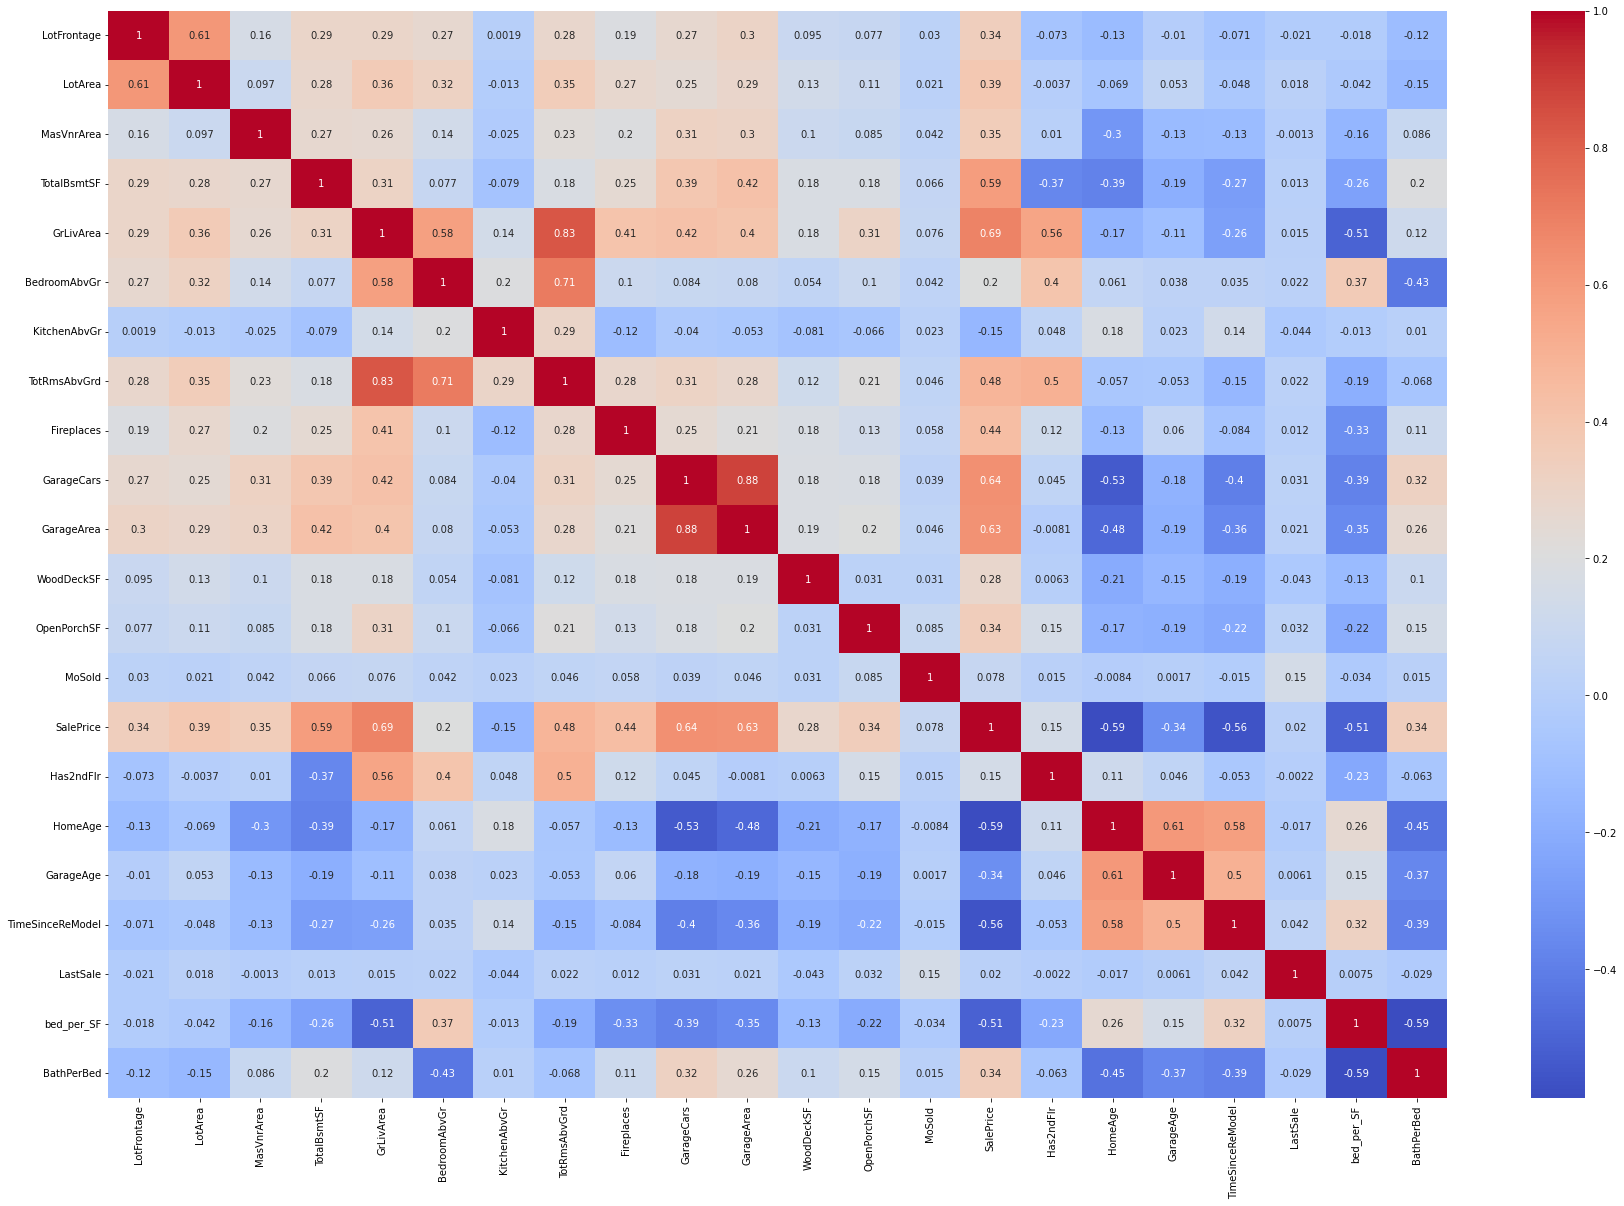

In [33]:
#checking correlations of numeric fields
# Heatmap to visualise the correlation

# figure size
plt.figure(figsize=(30,20))

#heatmap
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')
plt.show()

from the heatmap 
- GarageCars is highly correlated with GarageArea. will drop the Cars feature
- TotRmsAbvGrd is highly correlated with GrLivArea and BedroomAbvGr, dropping rooms feature

all others have an absolute pearson r value of less than 0.7 will retain the others

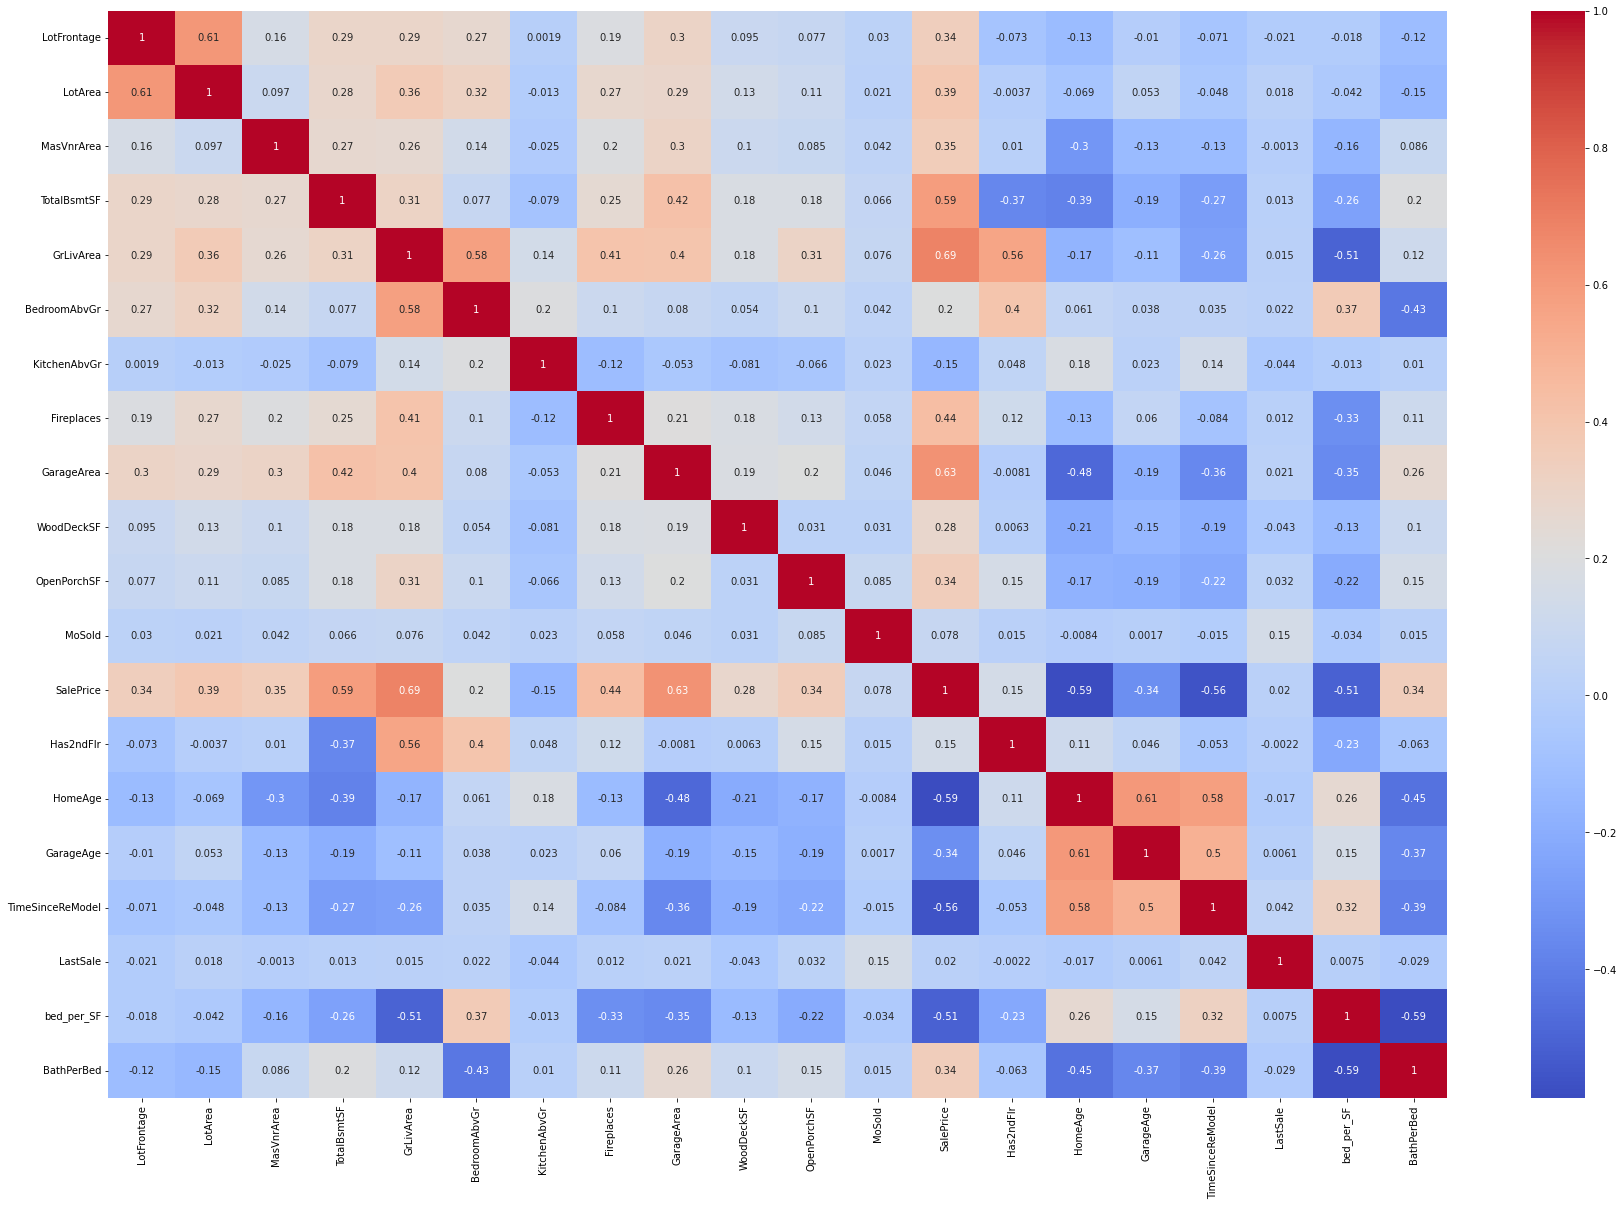

In [34]:
housing.drop(['GarageCars','TotRmsAbvGrd'], axis=1, inplace=True)

# figure size
plt.figure(figsize=(30,20))

#heatmap once more to confirm
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')
plt.show()

In [35]:
#there are some categorical features where order does matter ie good vs excellent. Will begin to map these 
#for others, splitting into dummies may be best

#ordinals
housing['Functional'] = housing['Functional'].map({'Typ':7,'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3,'Maj2':2, 'Sev':1,'Sal':0})
housing['ExterQual'] = housing['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['ExterCond'] = housing['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['BsmtQual'] = housing['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
housing['BsmtCond'] = housing['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
housing['GarageQual'] = housing['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None - Garage':0})
housing['GarageCond'] = housing['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
housing['PavedDrive'] =  housing['PavedDrive'].map({'Y':2, 'P':1, 'N':0})

#categorical and numeric varibles with numeric values but dtype incorrect

obj_num_categoricals = ['OverallQual','OverallCond','MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']

for col in obj_num_categoricals:
    housing[col] = housing[col].astype(int)


#binary fields
housing['CentralAir'] = housing['CentralAir'].map({'Y':1, 'N':0})



#after the above run only categorical fields not having a numeric value will be left
num_vars2 = list(housing.describe().T.index)

#list of categorical variables
cat_vars = [i for i in housing.columns if i not in num_vars2]

for col in cat_vars:
    housing[col] = housing[col].astype(str).apply(lambda x : x.replace(x, col + '-' + x))
    
    
    
housing['GarageFinish'].head()

0    GarageFinish-RFn
1    GarageFinish-RFn
2    GarageFinish-RFn
3    GarageFinish-Unf
4    GarageFinish-RFn
Name: GarageFinish, dtype: object

successfully added column name as prefix to value, now I can split into dummies

In [36]:
cat_vars

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

In [37]:
#splitting into dummies and concatenating to housing dataset

for col in cat_vars:
    dummy = pd.get_dummies(housing[col], drop_first=True)
    housing = pd.concat([housing,dummy], axis=1)
    housing.drop([col], axis=1, inplace=True)
    

housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType-ConLI,SaleType-ConLw,SaleType-New,SaleType-Oth,SaleType-WD,SaleCondition-AdjLand,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial
0,60,65.0,8450,7,5,196.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,3,3,3,4,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0


In [38]:
#splitting dataset

house_train, house_test = train_test_split( housing, train_size= 0.75, test_size=0.25, random_state=1)

house_train.shape


(956, 180)

In [39]:
#time to rescale variables - regularisation needs all variables to be scaled similarly

#instantiate object
scaler = MinMaxScaler()

#fit and transform train set
columns = house_train.columns
house_train = scaler.fit_transform(house_train)
house_train = pd.DataFrame(house_train, columns=columns)

house_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType-ConLI,SaleType-ConLw,SaleType-New,SaleType-Oth,SaleType-WD,SaleCondition-AdjLand,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial
0,0.176471,0.242236,0.582471,0.444444,0.625,0.000000,0.333333,0.333333,0.6,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.235294,0.273292,0.547414,0.555556,0.500,0.000000,0.333333,0.333333,0.8,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.823529,0.000000,0.022546,0.555556,0.500,0.698529,0.333333,0.333333,0.6,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.285714,0.455311,0.333333,0.500,0.000000,0.333333,0.333333,0.4,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.304348,0.179622,0.555556,0.500,0.360294,0.666667,0.333333,0.8,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
#transform test set

house_test = scaler.transform(house_test)
house_test = pd.DataFrame(house_test, columns=columns)


In [41]:
#splitting into predictors and response

#response 
y_train = house_train.pop('SalePrice')
y_test = house_test.pop('SalePrice')


#predictors
X_train = house_train
X_test = house_test

In [42]:

#building model using RFE selections to select 45 features
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
print(col)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'GarageArea', 'GarageQual', 'HomeAge', 'bed_per_SF', 'MSZoning-FV',
       'MSZoning-RH', 'MSZoning-RL', 'MSZoning-RM', 'LotConfig-FR3',
       'Neighborhood-BrkSide', 'Neighborhood-Crawfor', 'Neighborhood-NPkVill',
       'Neighborhood-NridgHt', 'Neighborhood-StoneBr', 'Neighborhood-Veenker',
       'Condition1-RRAe', 'Condition1-RRNn', 'BldgType-2fmCon',
       'BldgType-Duplex', 'HouseStyle-2.5Fin', 'Exterior1st-AsphShn',
       'Exterior1st-BrkFace', 'Exterior1st-ImStucc', 'Exterior1st-Stone',
       'Exterior2nd-Stone', 'Exterior2nd-Stucco', 'BsmtFinType1-NA',
       'Electrical-Mix', 'GarageType-NA', 'SaleType-CWD', 'SaleType-Con',
       'SaleType-ConLI', 'SaleType-ConLw', 'SaleType-New', 'SaleType-Oth',
       'SaleCondition-AdjLand', 'SaleCondition-Partial'],
     

## Model Building and Evaluation

#### Ridge Regression

In [43]:
X_train = X_train[col]
X_test = X_test[col]

In [44]:
#list of possible alpha hyperparameter values for tuning
params = {'alpha': [1e-7,1e-6,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 
                    3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                    30.0, 50.0, 100.0, 500.0, 1000.0]}

#instantiate ridge object
ridge = Ridge()

#hyperparamter tuning
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model_cv_ridge = GridSearchCV(estimator=ridge,
                       param_grid = params,
                       scoring= 'neg_mean_absolute_error',
                       cv= folds,
                       return_train_score= True,
                       verbose = 1)

model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20.0, 30.0, 50.0, 100.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# cv results
pd.set_option('display.max_columns', 500)
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002716,0.000747,0.001496,0.000457,0.0,{'alpha': 1e-07},-0.044779,-0.043451,-0.048954,-0.042397,-0.040998,-0.044116,0.002719,17,-0.039684,-0.039914,-0.039057,-0.040735,-0.040653,-0.040009,0.000626
1,0.002572,0.000377,0.001059,0.000111,0.000001,{'alpha': 1e-06},-0.044779,-0.043451,-0.048954,-0.042397,-0.040998,-0.044116,0.002719,16,-0.039684,-0.039914,-0.039057,-0.040735,-0.040653,-0.040009,0.000626
2,0.002119,0.000723,0.000600,0.000490,0.00001,{'alpha': 1e-05},-0.044779,-0.043451,-0.048954,-0.042397,-0.040998,-0.044116,0.002719,15,-0.039684,-0.039914,-0.039057,-0.040735,-0.040653,-0.040009,0.000626
3,0.002225,0.000232,0.001186,0.000144,0.0001,{'alpha': 0.0001},-0.044779,-0.043451,-0.048954,-0.042397,-0.040998,-0.044116,0.002719,14,-0.039684,-0.039915,-0.039057,-0.040735,-0.040653,-0.040009,0.000626
4,0.001887,0.000467,0.001222,0.000233,0.001,{'alpha': 0.001},-0.044778,-0.043449,-0.048950,-0.042394,-0.040995,-0.044113,0.002718,13,-0.039685,-0.039917,-0.039057,-0.040736,-0.040655,-0.040010,0.000627
5,0.002081,0.000065,0.001002,0.000004,0.01,{'alpha': 0.01},-0.044774,-0.043437,-0.048908,-0.042371,-0.040971,-0.044092,0.002713,12,-0.039697,-0.039940,-0.039057,-0.040744,-0.040676,-0.040023,0.000631
6,0.001869,0.000589,0.001314,0.000452,0.05,{'alpha': 0.05},-0.044772,-0.043379,-0.048795,-0.042325,-0.040934,-0.044041,0.002690,11,-0.039757,-0.040049,-0.039101,-0.040791,-0.040783,-0.040096,0.000642
7,0.002745,0.000616,0.001416,0.000461,0.1,{'alpha': 0.1},-0.044763,-0.043296,-0.048688,-0.042383,-0.040919,-0.044010,0.002652,10,-0.039858,-0.040179,-0.039203,-0.040881,-0.040926,-0.040209,0.000648
8,0.002849,0.000435,0.001200,0.000400,0.2,{'alpha': 0.2},-0.044760,-0.043157,-0.048495,-0.042494,-0.040884,-0.043958,0.002587,9,-0.040047,-0.040418,-0.039403,-0.041073,-0.041193,-0.040427,0.000663
9,0.002214,0.000750,0.001027,0.000624,0.3,{'alpha': 0.3},-0.044770,-0.043029,-0.048340,-0.042570,-0.040870,-0.043916,0.002537,8,-0.040201,-0.040665,-0.039567,-0.041243,-0.041402,-0.040615,0.000676


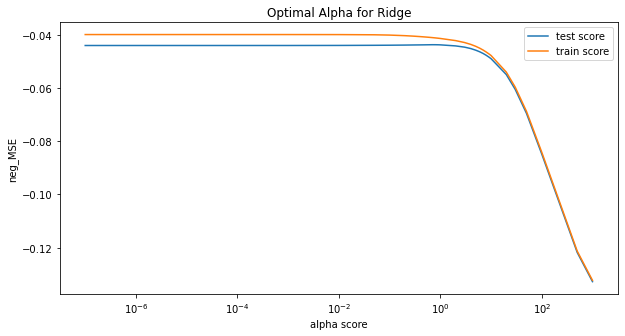

In [46]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_test_score"])
plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_train_score"])
plt.xlabel('alpha score')
plt.ylabel('neg_MSE')
plt.xscale('log')
plt.title("Optimal Alpha for Ridge")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

In [47]:
#best value for ridge alpha 
print(model_cv_ridge.best_params_)

{'alpha': 0.7}


In [48]:
#the best neg_mse for ridge

print("the best negative mean square error for Rigde is: ", model_cv_ridge.best_score_)

the best negative mean square error for Rigde is:  -0.04382032897402508


In [49]:
#final paramters for Ridge model

alpha_ridge = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=alpha_ridge)

#fit model
ridge.fit(X_train, y_train)



Ridge(alpha=0.7)

In [50]:
# Print the coefficients and intercept

model_parameter_ridge = list(ridge.coef_)

# Inserting the intercept
print('intercept:', ridge.intercept_)

# Assigning the columns to a variable
cols_ridge = X_train.columns

# Creating a dataframe for the features with coefficients
ridge_df = pd.DataFrame(list(zip(cols_ridge,model_parameter_ridge)))
ridge_df.columns = ['Feature','Coefficient']

ridge_df['coef_abs_value'] = ridge_df['Coefficient'].apply(lambda  x : np.absolute(x))

# Sorting the dataframe
ridge_df.sort_values(by='coef_abs_value',ascending=False, inplace=True)
ridge_df.drop(['coef_abs_value'], axis = 1, inplace = True)

print("Top Features in Ridge Model")
ridge_df.head(10)

intercept: -0.2938656365822174
Top Features in Ridge Model


,Feature,Coefficient
7,GrLivArea,0.493989
2,OverallQual,0.248522
6,TotalBsmtSF,0.193288
15,HomeAge,-0.176901
3,OverallCond,0.153721
13,GarageArea,0.122199
39,BsmtFinType1-NA,0.115005
17,MSZoning-FV,0.107392
4,BsmtQual,0.100069
32,HouseStyle-2.5Fin,-0.098456


In [51]:
#evaluation metrics

y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print('r2 train: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print('r2 test: ',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print('RSS train: ',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print('RSS test: ',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print('MSE train: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print('MSE test: ',mse_test_lr)


r2 train:  0.9157301643105313
r2 test:  0.8927063601032452
RSS train:  2.844164315745089
RSS test:  1.2276294819802136
MSE train:  0.002975067275883984
MSE test:  0.003848368282069635


Ridge regression has performed very well with an r2 value of 89.2% on the test set

#### Quesiton 1 - what happens if alphs is doubled, what are the most importance features

In [52]:
#final paramters for Ridge model

ridge_double = Ridge(alpha=alpha_ridge*2)

#fit model
ridge_double.fit(X_train, y_train)

Ridge(alpha=1.4)

In [53]:
# Print the coefficients and intercept
model_parameter_ridge_double = list(ridge_double.coef_)

# Inserting the intercept
print('intercept:', ridge_double.intercept_)

# Assigning the columns to a variable
cols_ridge_double = X_train.columns

# Creating a dataframe for the features with coefficients
ridge_double_df = pd.DataFrame(list(zip(cols_ridge_double,model_parameter_ridge_double)))
ridge_double_df.columns = ['Feature','Coefficient']

ridge_double_df['coef_abs_value'] = ridge_double_df['Coefficient'].apply(lambda  x : np.absolute(x))

# Sorting the dataframe
ridge_double_df.sort_values(by='coef_abs_value',ascending=False, inplace=True)
ridge_double_df.drop(['coef_abs_value'], axis = 1, inplace = True)


print("Top Features in Lasso Alpha Doubled Model")
ridge_double_df.head(10)

intercept: -0.25498801289327844
Top Features in Lasso Alpha Doubled Model


,Feature,Coefficient
7,GrLivArea,0.432959
2,OverallQual,0.251611
6,TotalBsmtSF,0.181813
15,HomeAge,-0.171138
3,OverallCond,0.144632
13,GarageArea,0.125124
39,BsmtFinType1-NA,0.103855
4,BsmtQual,0.098573
17,MSZoning-FV,0.093486
8,BsmtFullBath,0.088402


In [54]:
y_pred_train_ridge_double = ridge_double.predict(X_train)
y_pred_test_ridge_double = ridge_double.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_ridge_double)
print('r2 train: ',r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test_ridge_double)
print('r2 test: ',r2_test_lr)

r2 train:  0.9131490629740984
r2 test:  0.8945775181708655


very little in r2 on test and train set but the top 5 feature coefficients have changed 
- from [GrLivArea	0.493989, OverallQual 0.248522, TotalBsmtSF 0.193288, HomeAge -0.176901, OverallCond 0.153721] 

- to [GrLivArea 0.432959, OverallQual	0.251611, TotalBsmtSF 0.181813, HomeAge	-0.171138, OverallCond	0.144632]

#### Lasso Regression

In [ ]:
#instantiate lasso object
lasso = Lasso()

# hyperparameter tuning
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso

In [ ]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_test_score"])
plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_train_score"])
plt.xlabel('alpha score')
plt.ylabel('neg_MSE')
plt.xscale('log')
plt.title("Optimal Alpha for lasso")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

In [ ]:
#best value for lasso alpha 
print(model_cv_lasso.best_params_)

#the best neg_mse for lasso

print("the best negative mean square error for Rigde is: ", model_cv_lasso.best_score_)

In [ ]:
#final paramters for Lasso model

alpha_lasso = model_cv_lasso.best_params_['alpha']
lasso = Lasso(alpha=alpha_lasso)

#fit model
lasso.fit(X_train, y_train)



In [ ]:
# Print the coefficients and intercept
model_parameter_lasso = list(lasso.coef_)

# Inserting the intercept
print('intercept:', lasso.intercept_)

# Assigning the columns to a variable
cols_lasso = X_train.columns

# Creating a dataframe for the features with coefficients
lasso_df = pd.DataFrame(list(zip(cols_lasso,model_parameter_lasso)))
lasso_df.columns = ['Feature','Coefficient']

lasso_df['coef_abs_value'] = lasso_df['Coefficient'].apply(lambda  x : np.absolute(x))

# Sorting the dataframe
lasso_df.sort_values(by='coef_abs_value',ascending=False, inplace=True)
lasso_df.drop(['coef_abs_value'], axis = 1, inplace = True)


print("Top Features in Lasso Model")
lasso_df.head(10)

In [ ]:
#evaluation metrics for Lasso

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)


r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print('r2 train: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print('r2 test: ',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print('RSS train: ',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print('RSS test: ',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print('MSE train: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print('MSE test: ',mse_test_lr)


#### Question 1 - how does the model change if alpha is doubled and what becomes the most important predictor then

In [ ]:
#final paramters for Lasso model

lasso_double = Lasso(alpha=alpha_lasso*2)

#fit model
lasso_double.fit(X_train, y_train)

In [ ]:
# Print the coefficients and intercept
model_parameter_lasso_double = list(lasso_double.coef_)

# Inserting the intercept
print('intercept:', lasso_double.intercept_)

# Assigning the columns to a variable
cols_lasso_double = X_train.columns

# Creating a dataframe for the features with coefficients
lasso_double_df = pd.DataFrame(list(zip(cols_lasso_double,model_parameter_lasso_double)))
lasso_double_df.columns = ['Feature','Coefficient']

lasso_double_df['coef_abs_value'] = lasso_double_df['Coefficient'].apply(lambda  x : np.absolute(x))

# Sorting the dataframe
lasso_double_df.sort_values(by='coef_abs_value',ascending=False, inplace=True)
lasso_double_df.drop(['coef_abs_value'], axis = 1, inplace = True)


print("Top Features in Lasso Alpha Doubled Model")
lasso_double_df.head(10)

In [ ]:
y_pred_train_lasso_double = lasso_double.predict(X_train)
y_pred_test_lasso_double = lasso_double.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_lasso_double)
print('r2 train: ',r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test_lasso_double)
print('r2 test: ',r2_test_lr)


essentially no change, top 5 features remain the same but their order is changed minorly

- changed to [GrLivArea 0.529749, OverallQual 0.276977, TotalBsmtSF 0.199021, HomeAge -0.181884, OverallCond 0.147191]

- changed from [GrLivArea 0.553884, OverallQual 0.259916, TotalBsmtSF 0.204669, HomeAge -0.185456, OverallCond 0.156998]

#### Question 3 - what are the top 5 predictors if the incoming data lacked the current top 5 (build new model)

In [ ]:
X_train_new = X_train.drop(['GrLivArea','OverallQual','TotalBsmtSF','HomeAge','OverallCond'], axis=1)

#instantiate lasso object
lasso_new = Lasso()

# cross validation
model_cv_lasso_new = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = True)            

model_cv_lasso_new.fit(X_train_new, y_train) 

#final paramters for Lasso new model

alpha_lasso_new = model_cv_lasso_new.best_params_['alpha']
lasso_new = Lasso(alpha=alpha_lasso_new)

#fit model new
lasso_new.fit(X_train_new, y_train)

# Print the coefficients and intercept of new model
model_parameter_new = list(lasso_new.coef_)

# Inserting the intercept
print('intercept:', lasso_new.intercept_)

# Assigning the columns to a variable
cols_lasso_new = X_train_new.columns

# Creating a dataframe for the features with coefficients
lasso_df_new = pd.DataFrame(list(zip(cols_lasso_new,model_parameter_new)))
lasso_df_new.columns = ['Feature','Coefficient']

lasso_df_new['coef_abs_value'] = lasso_df_new['Coefficient'].apply(lambda  x : np.absolute(x))

# Sorting the dataframe
lasso_df_new.sort_values(by='coef_abs_value',ascending=False, inplace=True)
lasso_df_new.drop(['coef_abs_value'], axis = 1, inplace = True)


print("Top Features in Lasso Model")
lasso_df_new.head(5)

In [ ]:
y_pred_train_lasso_new = lasso_new.predict(X_train_new)
y_pred_test_lasso_new = lasso_new.predict(X_test[X_train_new.columns])

r2_train_lr = r2_score(y_train, y_pred_train_lasso_new)
print('r2 train: ',r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test_lasso_new)
print('r2 test: ',r2_test_lr)

predictive power dropped but not substantially. Still 88% on test set

#### Residual Analysis

In [ ]:
#predictions


#plotting error terms 
fig = plt.figure( figsize=(20,7))
fig.suptitle('Error Terms', fontsize = 20)

ax = plt.subplot(1,2,1)
sns.distplot((y_train - y_pred_train_ridge), bins = 20)
ax.axvline(x=(y_train - y_pred_train_ridge).mean(),
            color='red')
ax.set_title("Ridge Regression")                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

ax = plt.subplot(1,2,2)
sns.distplot((y_train - y_pred_train_lasso), bins = 20)
ax.axvline(x=(y_train - y_pred_train_lasso).mean(),
            color='red')
ax.set_title("Lasso Regression")                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()

In [ ]:
#mean of residuals numerically

print("Ridge Regression Residual Mean: ",(y_train - y_pred_train_ridge).mean())
print("Lasso Regression Residual Mean: ",(y_train - y_pred_train_lasso).mean())

In [ ]:
#testing heteroscedasticity
res_ridge_model = y_train - y_pred_train_ridge
res_lasso_model = y_train - y_pred_train_lasso

fig = plt.figure(figsize=(20,10))
fig.suptitle('Heteroscedasticity plot', fontsize = 20)

ax = plt.subplot(1,2,1)
sns.scatterplot(y_pred_train_ridge, res_ridge_model, alpha=0.5)
plt.xlabel('Fitted values',fontsize = 18)
plt.ylabel('Residuals',fontsize = 18)
ax.set_title("Ridge Model") 

ax = plt.subplot(1,2,2)
sns.scatterplot(y_pred_train_lasso, res_lasso_model, alpha=0.5)
plt.xlabel('Fitted values',fontsize = 18)
plt.ylabel('Residuals',fontsize = 18)
ax.set_title("Lasso Model") 

plt.show()


In [ ]:
fig= plt.figure(figsize=(20,10))
fig.suptitle("Normal Q-Q plot for housing dataset residuals")

ax = plt.subplot(1,2,1)
stats.probplot(res_ridge_model, dist="norm", plot=ax)
ax.set_title("Normal Q-Q plot for Housing dataset residuals for Ridge Model")

ax = plt.subplot(1,2,2)
stats.probplot(res_lasso_model, dist="norm", plot=ax)
ax.set_title("Normal Q-Q plot for Housing dataset residuals for Lasso Model")

plt.show()

on all training sets the linear assumptions appear to hold true with error terms normally distributed about a mean of approx 0, Q-Q plot indicating linearity in the terms, though near the ends there are outlier values, and the scatterplot of residuals are all within a specific horizontal band with no clear pattern

Lasso seems to fit slight better in the Q-Q plot

Though it should be noted that  values near the boundaries are more likely to be incorrectly predicted i.e values which lie between -2 SD and 2 SD from the mean are likely to be priced incorrectly. More work should be done on the model as there may be some features which need to transformed

### Observing how Ridge and Lasso Regression Coefficients differ

In [ ]:
#create a dataframe to store beat values

betas = pd.DataFrame(index=X_train.columns)
betas.rows=X_train.columns

#add data to dataframe
betas['Ridge'] = model_parameter_ridge
betas['Lasso'] = lasso.coef_

#transposed view of all features to compare lasso and ridge
betas.T

In [ ]:
#comparison of the number of significant features of ridge vs lasso 

rows = betas.shape[0]

ridge_features = (betas['Ridge'].abs() > 0).sum().sum()
print(f"number of significant features in Ridge: {ridge_features} out of {rows} total features")
print()

lasso_features = (betas['Ridge']> 0).sum().sum()
print(f"number of significant features in Lasso: {lasso_features} out of {rows} total features")
print()


In [ ]:
#visualising their predictions vs the true y values

res_ridge_model = y_train - y_pred_train_ridge
res_lasso_model = y_train - y_pred_train_lasso

fig = plt.figure(figsize=(20,5))
fig.suptitle('Predictions vs Actual values', fontsize = 20)

ax = plt.subplot(1,2,1)
sns.scatterplot(x=y_pred_test_ridge, y=y_test, alpha=0.5)
plt.xlabel('Predictions',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)
ax.set_title("Ridge Model") 


ax = plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_test_lasso, y=y_test, alpha=0.5)
plt.xlabel('Predictions',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)
ax.set_title("Lasso Model") 

plt.show()




Lasso lowered many coefficients to 0 while ridge took them close to 0. So While the Lasso model only used 36 of the 50 features, Ridge used all, as expected. 

### Conclusion

#### Ridge Model
- alpha = 0.7
- r-squared train:  0.9157301643105313
- r-squared test:  0.8927063601032452


#### Lasso Model
- alpha = 0.0001
- r-squared train:  0.9142013811213581
- r-squared test:  0.8977191255593224

#### <center>Top 5 Features by Model <center/>

| Ridge Regression | Lasso Regression |
|------------------|------------------|
|GrLivArea         |GrLivArea         |
|OverallQual       |OverallQual       |
|TotalBsmtSF       |TotalBsmtSF       |
|HomeAge           |HomeAge           |
|OverallCond       |OverallCond       |




Lasso regression performed equally as well as the Ridge model with a test score of 89.8%. This performance was achieved using fewer predictors which indicates that for this dataset a Lasso model is better for identifying the significant predictors in house price. 